In [1]:
# PCA section, Correlation, Heatmaps, and then Bivariate plots can be seen to be important
# Might have to adjust/improve my conclusions from the plots in future work

In [2]:
# Target variable ESRD patients: Avg. Annual Mortality rates is given the most importance
# One another target variable is: ESRD patients: Total (or %) deaths for target year
# Other target variables: Dialysis patients: Total (or %) deaths for target year

In [3]:
# For plotting
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Is not using ratio with recommended amounts. Ratios as used with Food Groups did not show any difference with the actual amount taken. However, that might change with food subgroups.

In [5]:
# data exploration
import pandas as pd
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()

Age-group: From USRDS  Age-group: To USRDS   Gender  \
0                      0                    4  Neutral   
1                      5                    9  Neutral   
2                     10                   13  Neutral   
3                     14                   17  Neutral   
4                     18                   21  Neutral   

   Actual Dark-green vegetables Intake  \
0                                53.14   
1                                77.63   
2                                89.90   
3                                84.75   
4                               118.68   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                    59.44                             68.81   
1                                    59.86                             75.65   
2                                    64.36                             95.91   
3                                    59.01                            106.73   
4                                    80.44                            130.53   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                           94.21                       171.86   
1                          106.01                       270.11   
2                          105.40                       317.60   
3                          127.41                       333.51   
4                          157.48                       357.26   

   Actual Taken Refined grains amount  \
0                               56.76   
1                               95.13   
2                              105.76   
3                              109.51   
4                               92.44   

   Avg Meat, Poultry and Eggs subgroup taken  \
0                                     109.77   
1                                     166.41   
2                                     197.84   
3                                     219.98   
4                                     247.67   

                        ...                        Avg Solid Fats taken  \
0                       ...                                       29.13   
1                       ...                                       38.78   
2                       ...                                       44.37   
3                       ...                                       44.35   
4                       ...                                       43.34   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                            478.86                           360.73   
1                            376.15                           588.17   
2                            367.35                           728.31   
3                            360.94                          1053.73   
4                            329.13                          1315.96   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                          360.00                            272.54   
1                          797.02                            368.94   
2                          654.79                            468.33   
3                          828.28                            563.57   
4                          892.47                            702.57   

   Avg Milk desserts, sauces, gravies taken  \
0                                     75.22   
1                                    111.76   
2                                    136.38   
3                                    153.97   
4                                    151.62   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   ESRD patients: Avg. Annual Mortality rates  \
0

In [6]:
df.describe()

Age-group: From USRDS  Age-group: To USRDS  \
count              18.000000            18.000000   
mean               38.833333            42.555556   
std                25.011174            25.270821   
min                 0.000000             4.000000   
25%                19.000000            21.750000   
50%                37.500000            41.500000   
75%                58.750000            62.750000   
max                80.000000            84.000000   

       Actual Dark-green vegetables Intake  \
count                            18.000000   
mean                             99.130556   
std                              17.652131   
min                              53.140000   
25%                              88.970000   
50%                             102.540000   
75%                             109.575000   
max                             123.600000   

       Actual Red and orange vegetables Intake  \
count                                18.000000   
mean                                 76.846111   
std                                  14.396199   
min                                  58.990000   
25%                                  62.732500   
50%                                  75.895000   
75%                                  86.757500   
max                                 107.380000   

       Actual Starchy vegetables Intake  Actual Other vegetables Intake  \
count                         18.000000                       18.000000   
mean                         120.507222                      166.633333   
std                           22.699854                       41.686472   
min                           68.810000                       94.210000   
25%                          116.727500                      153.160000   
50%                          124.245000                      169.410000   
75%                          130.317500                      186.677500   
max                          158.430000                      273.940000   

       Actual Whole grains intakes  Actual Taken Refined grains amount  \
count                    18.000000                           18.000000   
mean                    308.453333                           96.045000   
std                      60.717139                           10.869457   
min                     171.860000                           56.760000   
25%                     280.382500                           94.920000   
50%                     319.695000                           97.555000   
75%                     352.952500                          100.832500   
max                     384.180000                          109.510000   

       Avg Meat, Poultry and Eggs subgroup taken  Avg Seafood taken  \
count                                  18.000000          18.000000   
mean                                  225.951667         147.154444   
std                                    42.097246          28.813794   
min                                   109.770000          77.960000   
25%                                   202.702500         135.297500   
50%                                   239.305000         152.805000   
75%                                   247.425000         161.540000   
max                                   271.630000         188.230000   

                            ...                        Avg Solid Fats taken  \
count                       ...                                   18.000000   
mean                        ...                                   43.288333   
std                         ...                                    5.588004   
min                         ...                                   29.130000   
25%                         ...                                   40.647500   
50%                         ...                                   44.225000   
75%                         ...                                   46.895000   
max                         ...                 

In [7]:
df_actual_only = df.drop(['Age-group: From USRDS', 'Age-group: To USRDS', 'Gender'], axis=1)
df_actual_only.head()

Actual Dark-green vegetables Intake  \
0                                53.14   
1                                77.63   
2                                89.90   
3                                84.75   
4                               118.68   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                    59.44                             68.81   
1                                    59.86                             75.65   
2                                    64.36                             95.91   
3                                    59.01                            106.73   
4                                    80.44                            130.53   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                           94.21                       171.86   
1                          106.01                       270.11   
2                          105.40                       317.60   
3                          127.41                       333.51   
4                          157.48                       357.26   

   Actual Taken Refined grains amount  \
0                               56.76   
1                               95.13   
2                              105.76   
3                              109.51   
4                               92.44   

   Avg Meat, Poultry and Eggs subgroup taken  Avg Seafood taken  \
0                                     109.77              77.96   
1                                     166.41              93.47   
2                                     197.84             151.39   
3                                     219.98             131.60   
4                                     247.67             188.23   

   Avg Nuts, Seeds, and Soy Products taken  \
0                                    61.52   
1                                    70.79   
2                                    77.93   
3                                    88.97   
4                                   119.49   

   Avg Added Sugars/Sugars and sweets taken  \
0                                     57.97   
1                                     86.77   
2                                    123.34   
3                                    153.87   
4                                    216.02   

                        ...                        Avg Solid Fats taken  \
0                       ...                                       29.13   
1                       ...                                       38.78   
2                       ...                                       44.37   
3                       ...                                       44.35   
4                       ...                                       43.34   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                            478.86                           360.73   
1                            376.15                           588.17   
2                            367.35                           728.31   
3                            360.94                          1053.73   
4                            329.13                          1315.96   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                          360.00                            272.54   
1                          797.02                            368.94   
2                          654.79                            468.33   
3                          828.28                            563.57   
4                          892.47                            702.57   

   Avg Milk desserts, sauces, gravies taken  \
0                                     75.22   
1                                    111.76   
2                                    136.38   
3                                    153.97   
4                                    151.62   

   ESRD patients: Total (or %) deaths for target year  \
0          

In [8]:
####----
# steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
import sklearn
from sklearn import preprocessing
standardisedX = sklearn.preprocessing.scale(df_actual_only)
standardisedX = pd.DataFrame(standardisedX, index=df_actual_only.index, columns=df_actual_only.columns)
standardisedX.apply(np.mean), '---\n', standardisedX.apply(np.std)

(Actual Dark-green vegetables Intake                      -1.727014e-16
 Actual Red and orange vegetables Intake                  -3.083953e-16
 Actual Starchy vegetables Intake                          5.242720e-17
 Actual Other vegetables Intake                            2.220446e-16
 Actual Whole grains intakes                               1.258253e-15
 Actual Taken Refined grains amount                       -1.619075e-15
 Avg Meat, Poultry and Eggs subgroup taken                 3.577385e-16
 Avg Seafood taken                                         2.158767e-16
 Avg Nuts, Seeds, and Soy Products taken                   6.167906e-16
 Avg Added Sugars/Sugars and sweets taken                  2.652199e-16
 Avg Oils taken                                           -2.713879e-16
 Avg Solid Fats taken                                     -1.233581e-16
 Avg Milks and milk drinks  taken                          2.405483e-16
 Avg Water, noncarbonated intake                           0.000

In [9]:
y = abs(standardisedX['ESRD patients: Avg. Annual Mortality rates']) > 0.5 
standardisedX_with_target = standardisedX
standardisedX = standardisedX.drop(['ESRD patients: Avg. Annual Mortality rates', 'ESRD patients: Total (or %) deaths for target year',
                                   'Dialysis patients: Total (or %) deaths for target year', 'Dialysis patients: Avg. Annual Mortality rates'], axis=1)

In [10]:
from sklearn import decomposition
#pca = decomposition.PCA(n_components=2).fit(standardisedX)
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [12]:
####----
summary = pca_summary(pca, standardisedX)
####----

Importance of components:


sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1            3.021925           5.371782e-01              0.537178
PC2            1.948069           2.232338e-01              0.760412
PC3            1.034469           6.294863e-02              0.823361
PC4            0.921359           4.993539e-02              0.873296
PC5            0.730708           3.140792e-02              0.904704
PC6            0.657517           2.543113e-02              0.930135
PC7            0.591288           2.056595e-02              0.950701
PC8            0.489047           1.406863e-02              0.964770
PC9            0.403833           9.593000e-03              0.974363
PC10           0.383961           8.672104e-03              0.983035
PC11           0.343609           6.945144e-03              0.989980
PC12           0.292803           5.043147e-03              0.995023
PC13           0.211955           2.642648e-03              0.997666
PC14           0.153247           1.381451e-03              0.999047
PC15           0.116565           7.992577e-04              0.999846
PC16           0.051081           1.534882e-04              1.000000
PC17           0.001354           1.078160e-07              1.000000

In [13]:
# First five component can define over 90% 

In [14]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
np.sum( summary.sdev ** 2 )
plt.rcParams['figure.figsize'] = 8, 8

# Important Components

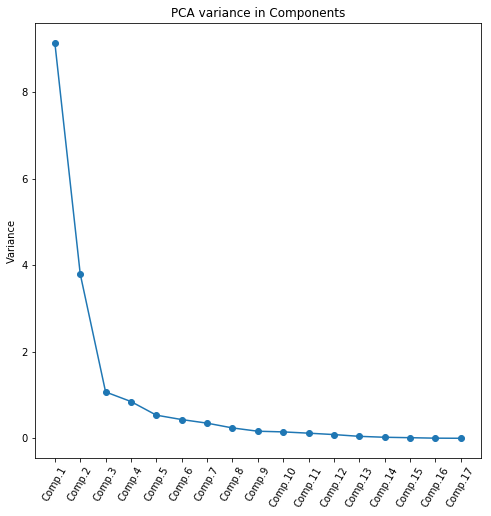

In [15]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.title('PCA variance in Components')
    plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png')            
    plt.show()

screeplot(pca, standardisedX)
#plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_variance' + '.png') 

In [16]:
# comp 3 to 4 has the most slope change - comp 7 starts the flat line
# first three are the most important
# Will retain first five though first three will be analyzed primarily

In [17]:
#summary.sdev**2
#pca.components_[0]
#np.sum(pca.components_[0]**2)

In [18]:
####----
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function with some adjustments
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [19]:
####----
calcpc(standardisedX, pca.components_[0])
pca.transform(standardisedX)[:, 0]
pca.transform(standardisedX)[:, 0]
pca.components_[1]
np.sum(pca.components_[1]**2)
#highest loadings for

0.9999999999999989

In [20]:
# Define high and low mortality
# The code below is not used.
# y as defined earlier will rather be used

#import sklearn 
#from sklearn import preprocessing
#standardisedX_mortality = sklearn.preprocessing.scale(df_diff_ratio_mortality)
#standardisedX_mortality = pd.DataFrame(standardisedX_mortality, index=df_diff_ratio_mortality.index, columns=df_diff_ratio_mortality.columns)
#standardisedX_mortality.apply(np.mean), '---', standardisedX_mortality.apply(np.std)
#standardisedX_mortality

Actual Dark-green vegetables Intake  \
0                             -2.680917   
1                             -1.253327   
2                             -0.538075   
3                             -0.838282   
4                              1.139591   
5                              1.426392   
6                              0.975789   
7                              0.273361   
8                              0.031446   
9                              0.296678   
10                             0.440078   
11                             0.101980   
12                             1.243935   
13                             0.134041   
14                             0.665088   
15                            -1.070870   
16                             0.263451   
17                            -0.610358   

    Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                 -1.244130                         -2.343451   
1                                 -1.214110                         -2.033392   
2                                 -0.892465                         -1.115000   
3                                 -1.274865                         -0.624526   
4                                  0.256879                          0.454336   
5                                 -1.276294                          0.048629   
6                                 -0.222014                         -0.111840   
7                                 -0.106937                          0.194140   
8                                  2.182459                          1.550423   
9                                 -1.047569                         -0.191168   
10                                -0.317793                          0.263042   
11                                 0.574950                          0.130224   
12                                 0.752927                          0.144730   
13                                 0.560655                          0.672374   
14                                 1.096729                          0.415805   
15                                -0.029027                          0.491053   
16                                 1.065994                          1.719051   
17                                 1.134612                          0.335570   

    Actual Other vegetables Intake  Actual Whole grains intakes  \
0                        -1.787702                    -2.314888   
1                        -1.496430                    -0.649816   
2                        -1.511487                     0.155011   
3                        -0.968191                     0.424643   
4                        -0.225941                     0.827141   
5                         0.065577                     1.180662   
6                        -0.060558                     1.131684   
7                        -0.022298                     1.283362   
8                         0.382521                     1.068132   
9                         0.791782                     0.535139   
10                        0.071502                     0.200938   
11                        0.519764                     0.180093   
12                        0.419794                     0.248730   
13                        0.236391                    -0.227489   
14                        0.642444                    -0.413571   
15                        0.662191                    -0.496443   
16                       -0.368122                    -1.381261   
17                        2.648765                    -1.752068   

    Actual Taken Refined grains amount  \
0                            -3.719039   
1                            -0.086621   
2                             0.919701   
3                             1.274707   
4                            -0.341279   
5                             0.061061   
6                             0.190756   
7                             0.5126

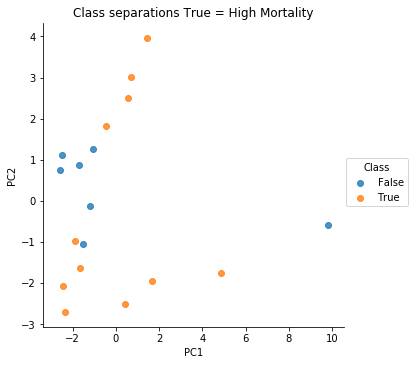

In [21]:
####----
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    #plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

# plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');
plt.title('Class separations True = High Mortality')
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_components_separating_high_low_mortality' + '.png')            
standardisedX

In [22]:
# first two components really cannot separate high and low mortality very effectively

# Plot first two components

Next section (i.e. four components) is more important than this

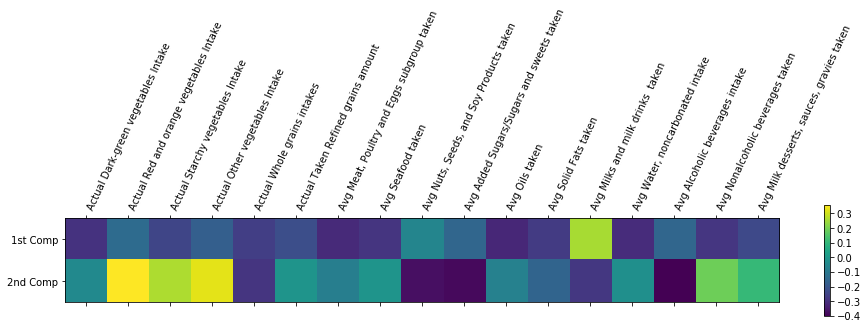

In [23]:
####----
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21


pca_components_cont = pca.components_[0:2]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1],['1st Comp','2nd Comp'],fontsize=10)
plt.colorbar()
#plt.xticks(range(1, len(df_esrdonly.columns)),df_esrdonly.columns[1:len(df_esrdonly.columns)],rotation=65)
plt.xticks(range(len(standardisedX.columns)),standardisedX.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_groups_what_contributes_to_PCA_components' + '.png')            
plt.show() # 
# from the abobe plot, Vegetable, Grain, Protein contribute the most to the 1st component

# First Five components

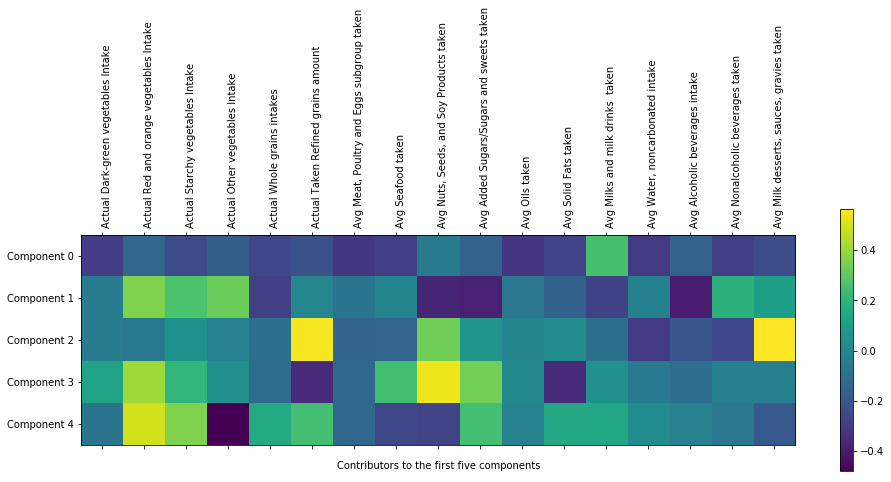

In [24]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21
plt.rcParams['figure.figsize'] = 30, 16
components_to_count = 5

pca_components_cont = pca.components_[0:components_to_count]
ylabels = []

for c in range (components_to_count):
    ylabels.append('Component ' + str(c) )

xlabels = []    
for c in range (components_to_count):
    xlabels.append(c) 
    
plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks(xlabels, ylabels, fontsize=10)
plt.colorbar()
plt.xlabel('\nContributors to the first five components')
plt.xticks(range(len(standardisedX.columns)), standardisedX.columns, rotation=90, ha='left')
plt.show()# 

In [25]:
standardisedX.columns

Index(['Actual Dark-green vegetables Intake',
       'Actual Red and orange vegetables Intake',
       'Actual Starchy vegetables Intake', 'Actual Other vegetables Intake',
       'Actual Whole grains intakes', 'Actual Taken Refined grains amount',
       'Avg Meat, Poultry and Eggs subgroup taken', 'Avg Seafood taken',
       'Avg Nuts, Seeds, and Soy Products taken',
       'Avg Added Sugars/Sugars and sweets taken', 'Avg Oils taken',
       'Avg Solid Fats taken', 'Avg Milks and milk drinks  taken',
       'Avg Water, noncarbonated intake', 'Avg Alcoholic beverages intake',
       'Avg Nonalcoholic beverages taken',
       'Avg Milk desserts, sauces, gravies taken'],
      dtype='object')

First five components explain the data by 90%

Contributors for the First Component: 
Positively: Avg Milks and milk drinks  taken ->  (0.4)

Negatively (-0.3 to -0.4) contributing: Actual Dark-green vegetables, Actual Starchy vegetables, Actual Whole grains, 
Avg Meat Poultry and Eggs subgroup, Avg Oils taken, Avg Water noncarbonated intake, Avg Nonalcoholic beverages taken     

Contributors for 2nd Component: 
Positively: Actual Red and orange vegetables Intake, Actual Other vegetables
Negatively: 'Avg Nuts, Seeds, and Soy Products', 'Avg Added Sugars/Sugars and sweets', 'Avg Alcoholic beverages'        
        
Contributors for 3rd component: 
Positively: 'Actual Taken Refined grains amount', 'Avg Milk desserts, sauces, gravies taken'
Negatively: Avg Water noncarbonated intake'

-------------------------------------------
Features that do not contribute much:
'Avg Seafood taken', 'Avg Solid Fats taken', 

---------------------------------------------

Considering all Five Components: 

Positively the most contributing:     
'Actual Taken Refined grains amount',  'Avg Milk desserts, sauces, gravies taken'  'Avg Nuts, Seeds, and Soy Products taken', 
'Actual Red and orange vegetables Intake'
    
Most Negatively:    
'Actual Other vegetables Intake',  'Avg Added Sugars/Sugars and sweets taken', Avg Alcoholic beverages intake  

---

Can do regression with all food sub groups except 'Avg Seafood taken', 'Avg Solid Fats taken'. Though will do a comparison with them as well

In [26]:
standardisedX_important = standardisedX_with_target.drop(['Avg Seafood taken', 'Avg Solid Fats taken'], axis=1)

In [27]:
standardisedX_important.head()

Actual Dark-green vegetables Intake  \
0                            -2.680917   
1                            -1.253327   
2                            -0.538075   
3                            -0.838282   
4                             1.139591   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                -1.244130                         -2.343451   
1                                -1.214110                         -2.033392   
2                                -0.892465                         -1.115000   
3                                -1.274865                         -0.624526   
4                                 0.256879                          0.454336   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                       -1.787702                    -2.314888   
1                       -1.496430                    -0.649816   
2                       -1.511487                     0.155011   
3                       -0.968191                     0.424643   
4                       -0.225941                     0.827141   

   Actual Taken Refined grains amount  \
0                           -3.719039   
1                           -0.086621   
2                            0.919701   
3                            1.274707   
4                           -0.341279   

   Avg Meat, Poultry and Eggs subgroup taken  \
0                                  -2.839852   
1                                  -1.455389   
2                                  -0.687139   
3                                  -0.145967   
4                                   0.530866   

   Avg Nuts, Seeds, and Soy Products taken  \
0                                -0.437326   
1                                 0.146545   
2                                 0.596258   
3                                 1.291613   
4                                 3.213916   

   Avg Added Sugars/Sugars and sweets taken  Avg Oils taken  \
0                                 -1.012328       -2.955409   
1                                 -0.411372       -1.827499   
2                                  0.351717       -0.059959   
3                                  0.988772        0.332828   
4                                  2.285627        0.929215   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                          3.211747                        -2.362491   
1                          1.091107                        -1.729765   
2                          0.909414                        -1.339903   
3                          0.777068                        -0.434602   
4                          0.120291                         0.294908   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                       -1.339208                         -2.362377   
1                        0.586769                         -1.840601   
2                       -0.040048                         -1.302642   
3                        0.724534                         -0.787144   
4                        1.007424                         -0.034791   

   Avg Milk desserts, sauces, gravies taken  \
0                                 -3.130639   
1                                 -1.307150   
2                                 -0.078515   
3                                  0.799294   
4                                  0.682020   

   ESRD patients: Total (or %) deaths for target year  \
0                                          -0.849800    
1                                          -0.853166    
2                                          -0.853942    
3                                          -0.853338    
4                                          -0.845486    

   ESRD patients: Avg. Annual Mortality rates  \
0                                   -0.453304   
1                                   -0.807897   
2                                   -0.850878  

In [28]:
standardisedX_important.corr()

Actual Dark-green vegetables Intake  \
Actual Dark-green vegetables Intake                                            1.000000   
Actual Red and orange vegetables Intake                                        0.314975   
Actual Starchy vegetables Intake                                               0.604202   
Actual Other vegetables Intake                                                 0.386319   
Actual Whole grains intakes                                                    0.677944   
Actual Taken Refined grains amount                                             0.504312   
Avg Meat, Poultry and Eggs subgroup taken                                      0.842950   
Avg Nuts, Seeds, and Soy Products taken                                        0.239257   
Avg Added Sugars/Sugars and sweets taken                                       0.469838   
Avg Oils taken                                                                 0.812912   
Avg Milks and milk drinks  taken                                              -0.629697   
Avg Water, noncarbonated intake                                                0.811729   
Avg Alcoholic beverages intake                                                 0.445895   
Avg Nonalcoholic beverages taken                                               0.730088   
Avg Milk desserts, sauces, gravies taken                                       0.599002   
ESRD patients: Total (or %) deaths for target year                             0.056973   
ESRD patients: Avg. Annual Mortality rates                                    -0.082390   
Dialysis patients: Total (or %) deaths for targ...                             0.054157   
Dialysis patients: Avg. Annual Mortality rates                                -0.076082   

                                                    Actual Red and orange vegetables Intake  \
Actual Dark-green vegetables Intake                                                0.314975   
Actual Red and orange vegetables Intake                                            1.000000   
Actual Starchy vegetables Intake                                                   0.775030   
Actual Other vegetables Intake                                                     0.584817   
Actual Whole grains intakes                                                       -0.040174   
Actual Taken Refined grains amount                                                 0.191073   
Avg Meat, Poultry and Eggs subgroup taken                                          0.218121   
Avg Nuts, Seeds, and Soy Products taken                                           -0.343774   
Avg Added Sugars/Sugars and sweets taken                                          -0.153671   
Avg Oils taken                                                                     0.273838   
Avg Milks and milk drinks  taken                                                  -0.647144   
Avg Water, noncarbonated intake                                                    0.338686   
Avg Alcoholic beverages intake                                                    -0.351494   
Avg Nonalcoholic beverages taken                                                   0.599470   
Avg Milk desserts, sauces, gravies taken                                           0.349643   
ESRD patients: Total (or %) deaths for target year                                 0.572518   
ESRD patients: Avg. Annual Mortality rates                                         0.545127   
Dialysis patients: Total (or %) deaths for targ...                                 0.577456   
Dialysis patients: Avg. Annual Mortality rates                                     0.564846   

                                                    Actual Starchy vegetables Intake  \
Actual Dark-green vegetables Intake                                         0.604202   
Actual Red and orange vegetables Intake                                     0.775030   
Actual Starchy vegetables Intake                                  

Index(['Actual Dark-green vegetables Intake',
       'Actual Red and orange vegetables Intake',
       'Actual Starchy vegetables Intake', 'Actual Other vegetables Intake',
       'Actual Whole grains intakes', 'Actual Taken Refined grains amount',
       'Avg Meat, Poultry and Eggs subgroup taken',
       'Avg Nuts, Seeds, and Soy Products taken',
       'Avg Added Sugars/Sugars and sweets taken', 'Avg Oils taken',
       'Avg Milks and milk drinks  taken', 'Avg Water, noncarbonated intake',
       'Avg Alcoholic beverages intake', 'Avg Nonalcoholic beverages taken',
       'Avg Milk desserts, sauces, gravies taken',
       'ESRD patients: Total (or %) deaths for target year',
       'ESRD patients: Avg. Annual Mortality rates',
       'Dialysis patients: Total (or %) deaths for target year',
       'Dialysis patients: Avg. Annual Mortality rates'],
      dtype='object')

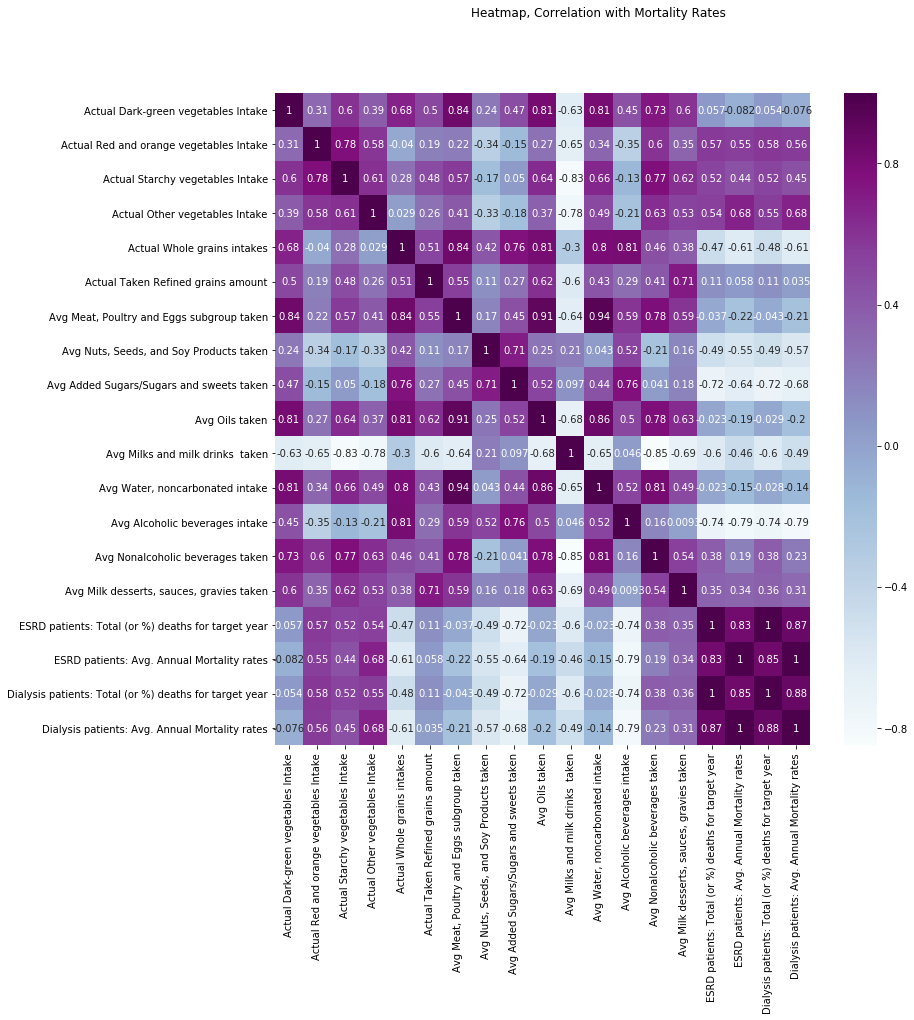

In [29]:
plt.figure(figsize=(12, 12))


corr = standardisedX_important.corr() #df_diff_ratio_with_mortality.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
           cmap="BuPu");
plt.suptitle('Heatmap, Correlation with Mortality Rates');
plt.savefig('heatmap-ckd-mortality-subgroup-regression-after-pca.png')
standardisedX_important.columns

Most Positvely Correlated: 'Actual Other vegetables Intake',    'Actual Red and orange vegetables Intake', 'Actual Starchy vegetables Intake',    

Most Negatively Correlated: 'Avg Alcoholic beverages intake' (-0.79),    'Avg Added Sugars/Sugars and sweets taken' (-0.64), 'Avg Nuts, Seeds, and Soy Products taken' (-0.55)   

# Check: the data

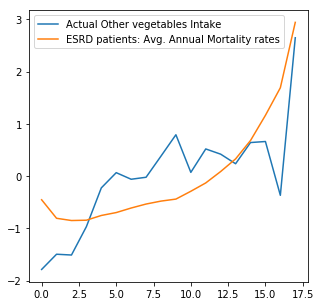

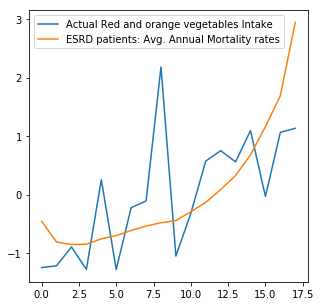

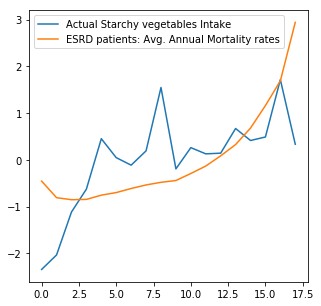

In [30]:
plt.rcParams['figure.figsize'] = 5, 5 
positively = standardisedX_important[ ['Actual Other vegetables Intake', 'Actual Red and orange vegetables Intake', 'Actual Starchy vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_other = positively[['Actual Other vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_other.plot.line()
plt.savefig('positive_subgroup_line_1')

positively_red = positively[['Actual Red and orange vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_red.plot.line()
plt.savefig('positive_subgroup_line_2')

positively_starchy = positively[['Actual Starchy vegetables Intake', 'ESRD patients: Avg. Annual Mortality rates']]
positively_starchy.plot.line()
plt.savefig('positive_subgroup_line_3')

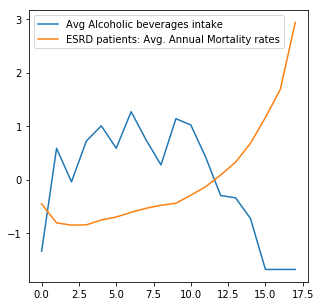

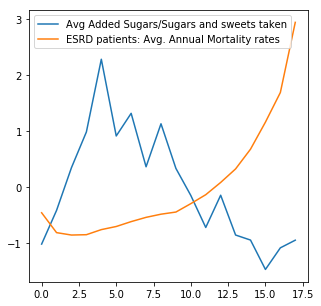

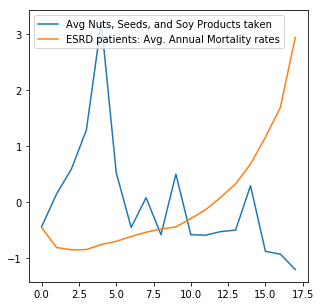

In [31]:
negatively= standardisedX_important[ ['Avg Alcoholic beverages intake', 'Avg Added Sugars/Sugars and sweets taken', 'Avg Nuts, Seeds, and Soy Products taken',  'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol = negatively[['Avg Alcoholic beverages intake', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_alcohol.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_1')

negatively_sugar = negatively[['Avg Added Sugars/Sugars and sweets taken', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_sugar.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_2')

negatively_nuts = negatively[['Avg Nuts, Seeds, and Soy Products taken', 'ESRD patients: Avg. Annual Mortality rates']]
negatively_nuts.plot.line()
plt.savefig('./saved-images/negatively_subgroup_line_3')

# The following code were relevant for exploration phase. For experiment and methodology the above code are relevant


# Univariate

Checked and plotted each column. 

Recommended intake amount is not included in the data (can be calculated like food groups)


In [33]:
"""
plt.figure(figsize=(16, 5));
#plt.rcParams['figure.figsize'] = 14, 14
df[' Actual Dark-green vegetables Intake'].plot.bar();
#plt.setxlabels(df['age_to'])
plt.suptitle('Actual Dark-green vegetables Intake')
plt.xticks(range(len(df[' Age-group: From USRDS'])), df[' Age-group: From USRDS']);
plt.xlabel('Age Group: From')
"""

"\nplt.figure(figsize=(16, 5));\n#plt.rcParams['figure.figsize'] = 14, 14\ndf[' Actual Dark-green vegetables Intake'].plot.bar();\n#plt.setxlabels(df['age_to'])\nplt.suptitle('Actual Dark-green vegetables Intake')\nplt.xticks(range(len(df[' Age-group: From USRDS'])), df[' Age-group: From USRDS']);\nplt.xlabel('Age Group: From')\n"

Text(0.5,0.98,'Univariate plots, Check Legends for Aspect')

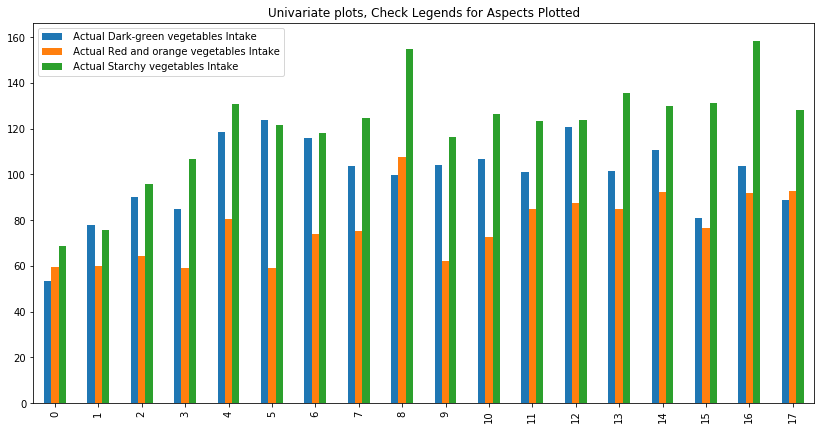

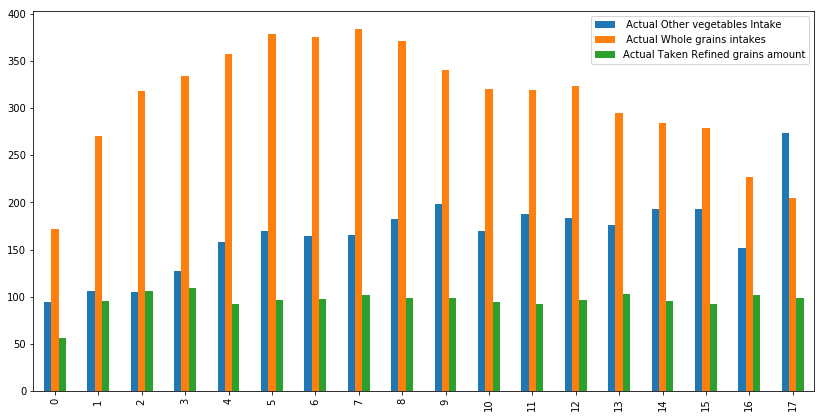

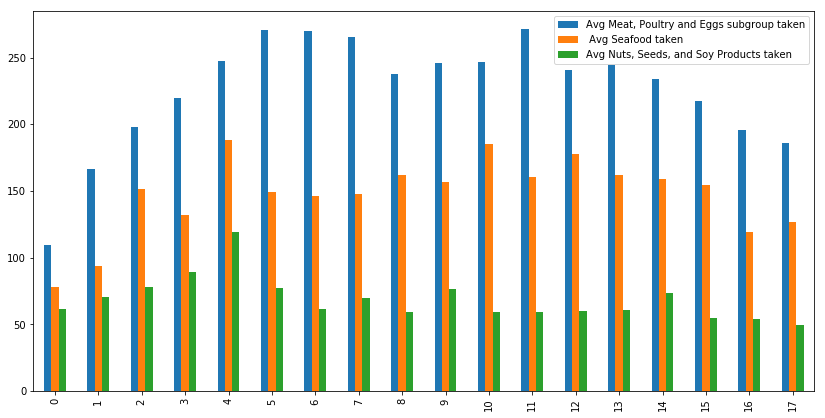

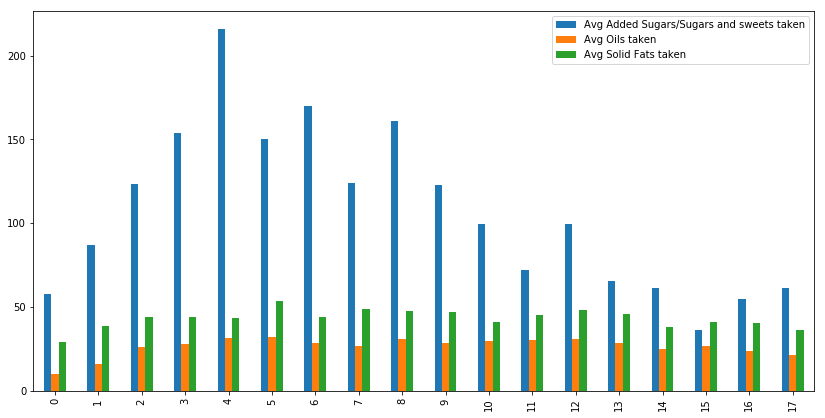

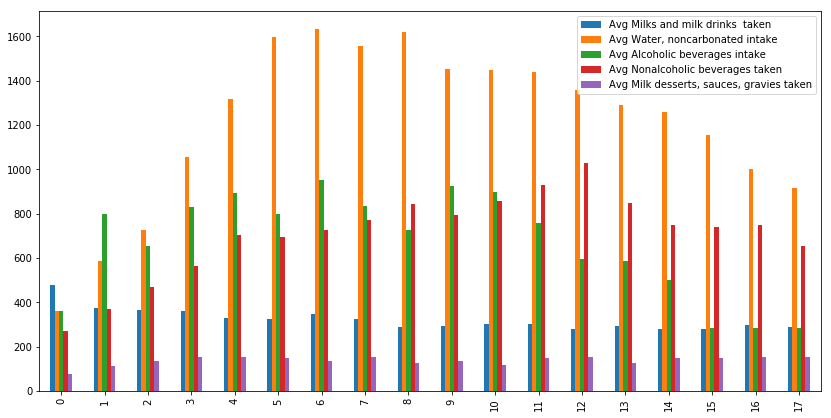

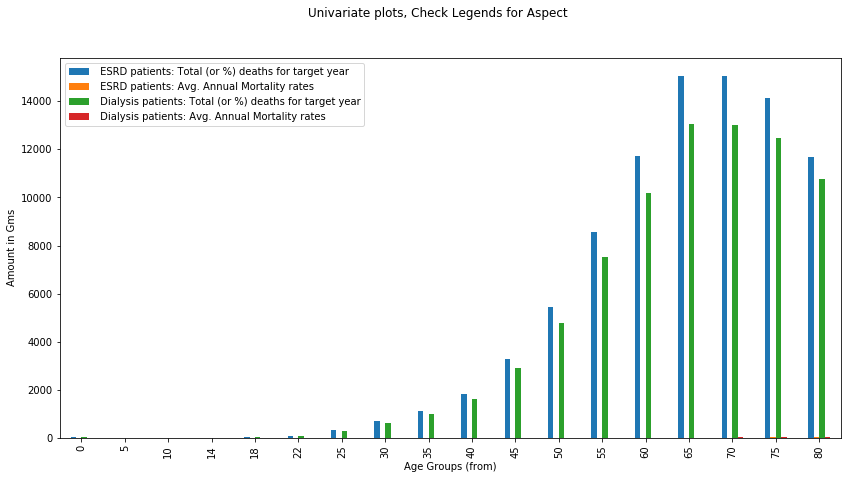

In [36]:
df = pd.read_csv('./data-for-code/older_no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
#plt.figure(figsize=(16, 5));
plt.rcParams['figure.figsize'] = 14, 7
df1 = df.iloc[:,3:6]
df2 = df.iloc[:,6:9]
df3 = df.iloc[:,9:12]
df4 = df.iloc[:,12:15]
df5 = df.iloc[:,15:20]
df6 = df.iloc[:,20:24]

#df7 = df.iloc[:,22:24]
#df8 = df.iloc[:,30:33]
#df9 = df.iloc[:,33:36]

df1.plot.bar();
plt.title('Univariate plots, Check Legends for Aspects Plotted')

df2.plot.bar();
df3.plot.bar();
df4.plot.bar();
df5.plot.bar();
df6.plot.bar();
#df7.plot.bar();
#df8.plot.bar();
#df9.plot.bar();

plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);
plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')




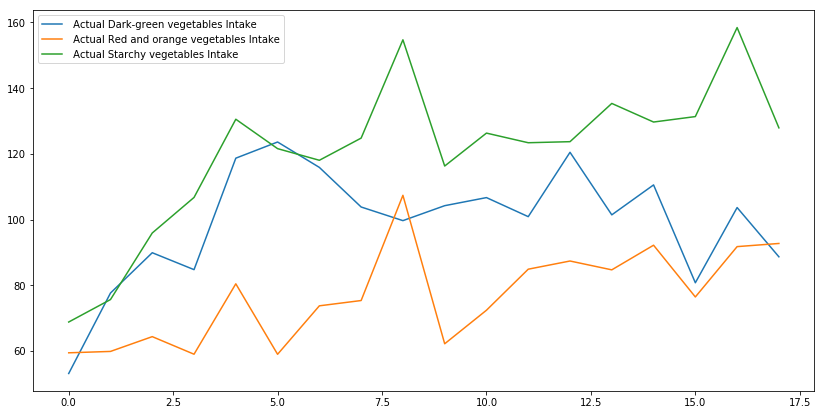

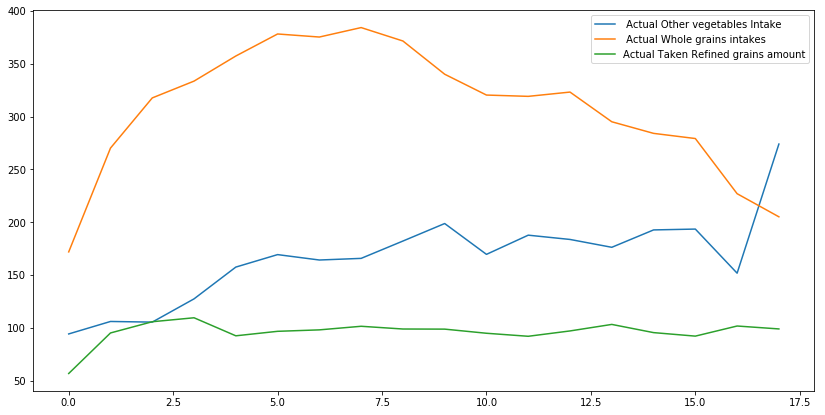

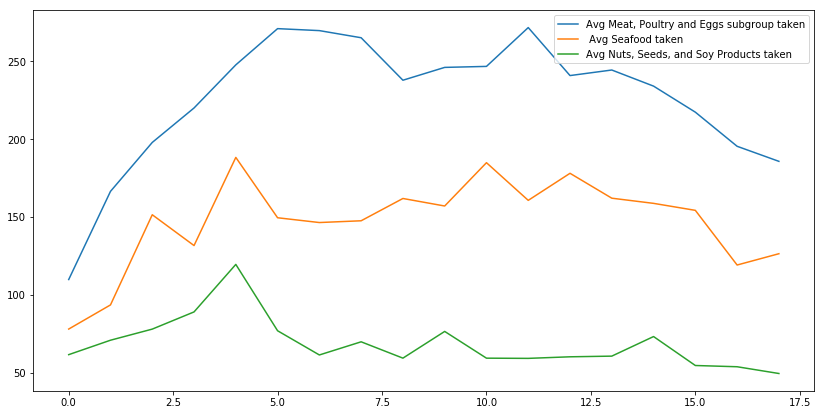

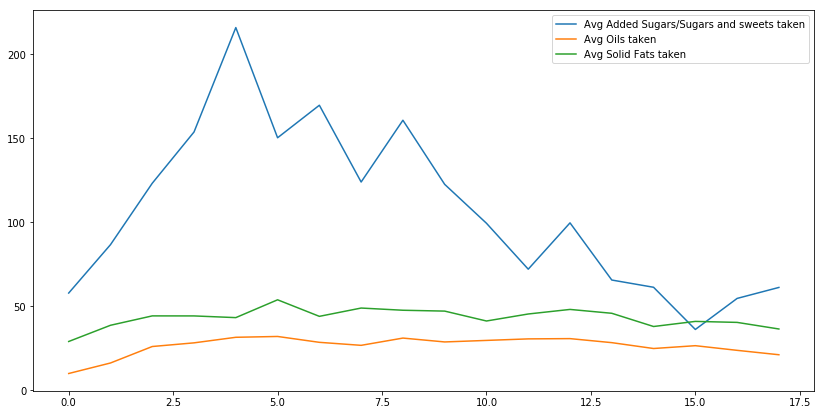

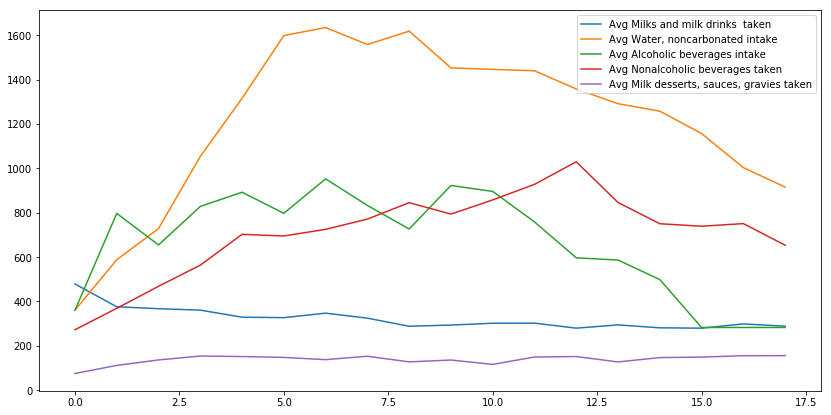

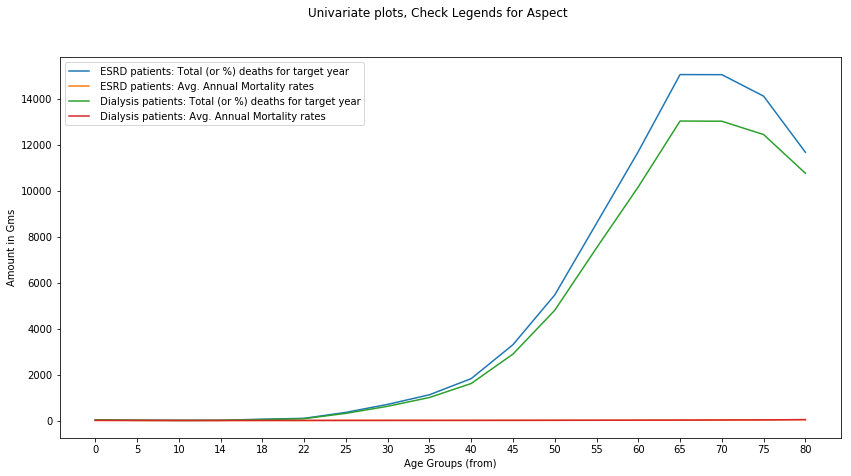

In [37]:
df1.plot.line();
df2.plot.line();
df3.plot.line();
df4.plot.line();
df5.plot.line();
df6.plot.line();
#df7.plot.line();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

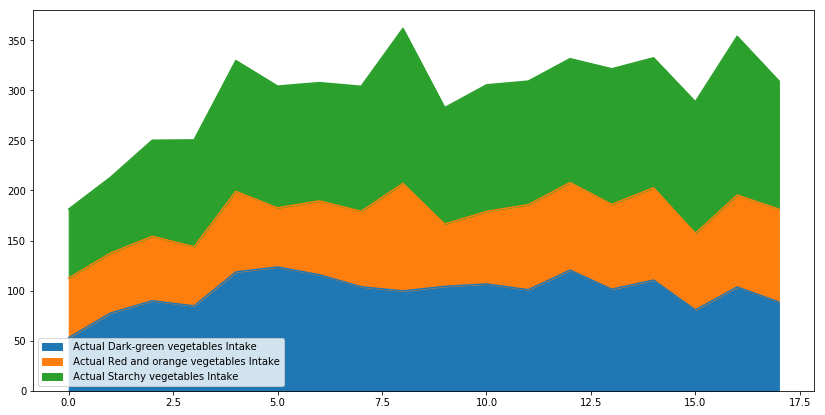

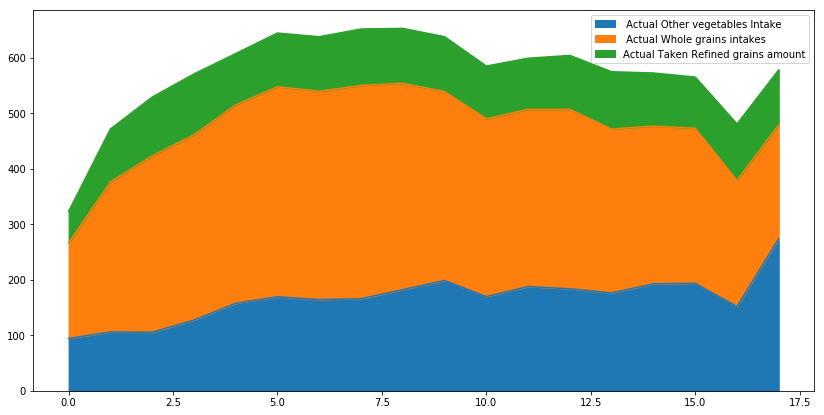

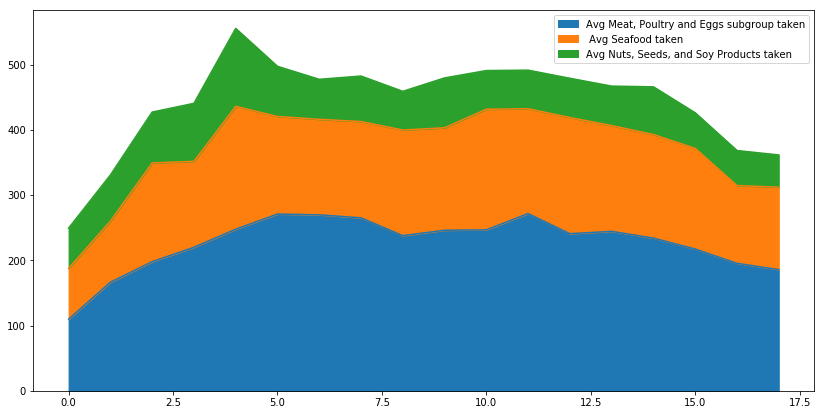

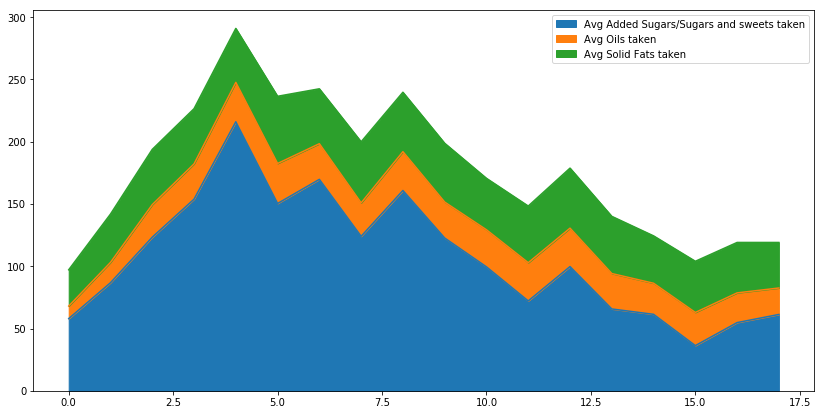

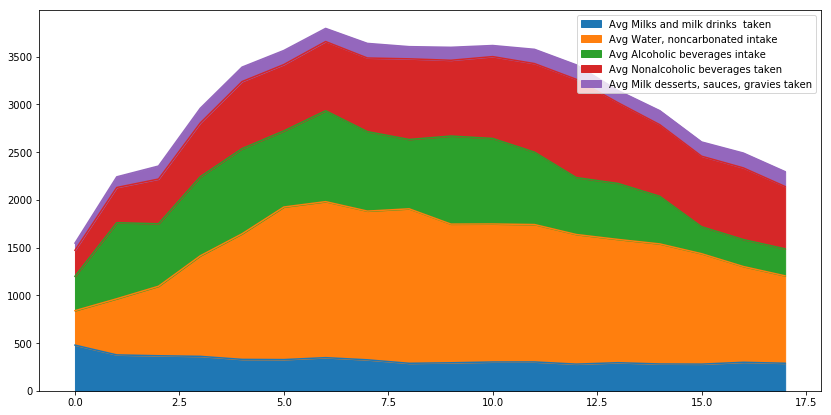

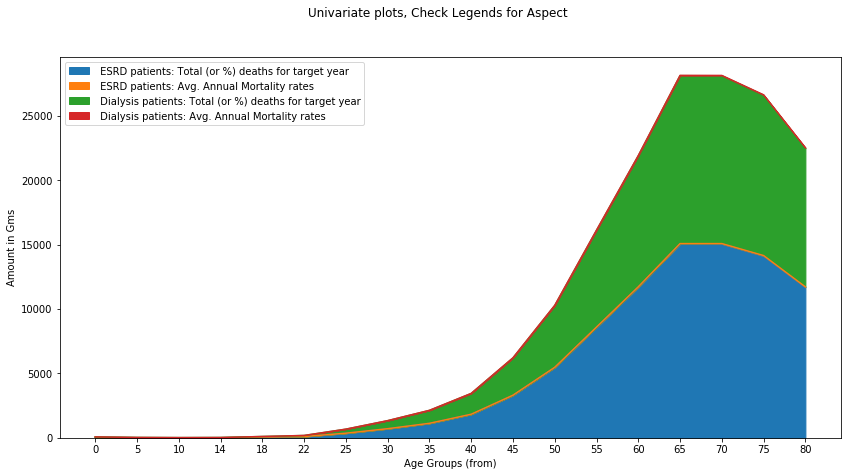

In [38]:

df1.plot.area();
df2.plot.area();
df3.plot.area();
df4.plot.area();
df5.plot.area();
df6.plot.area();
#df7.plot.area();

plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

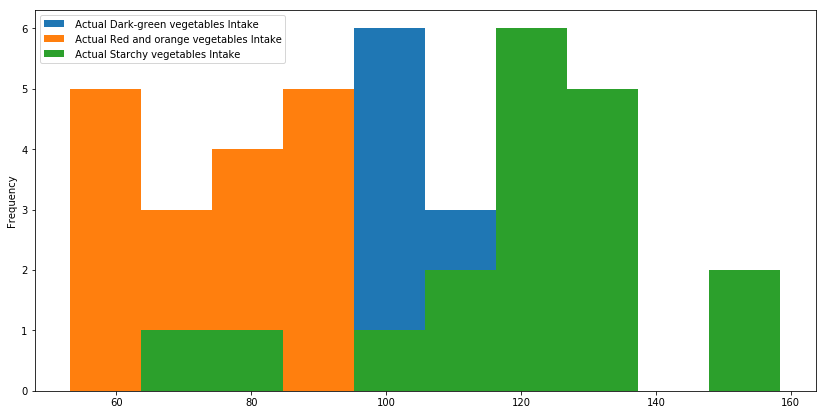

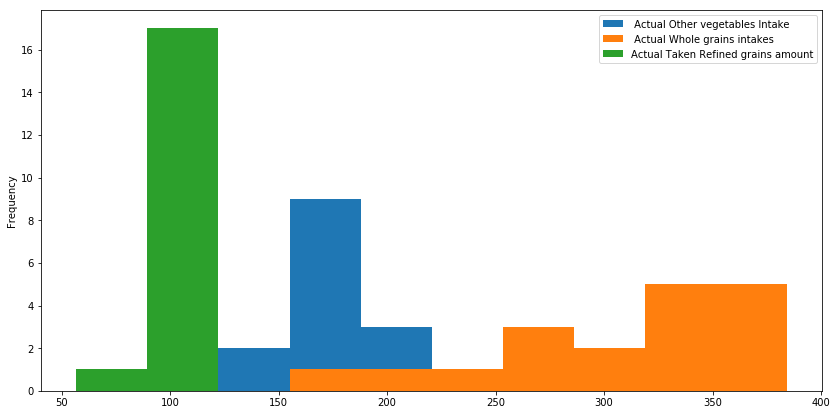

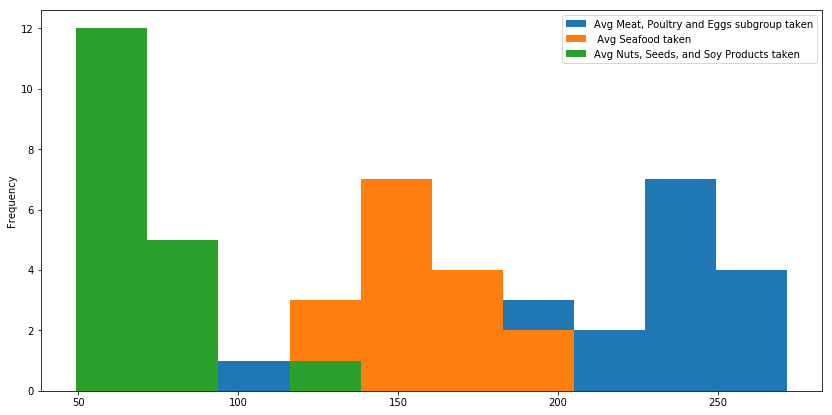

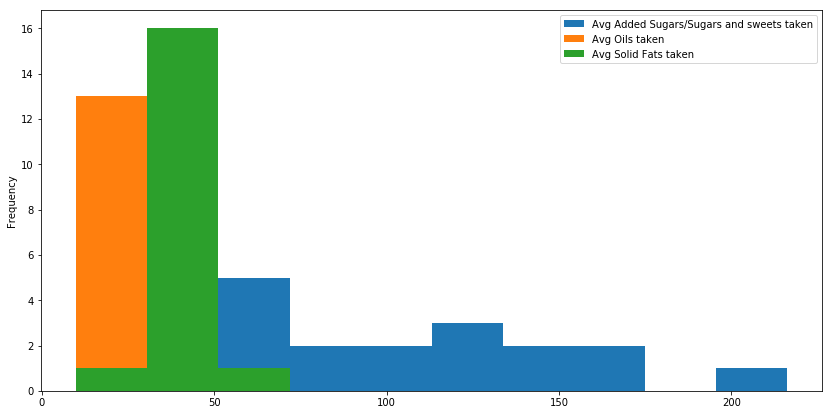

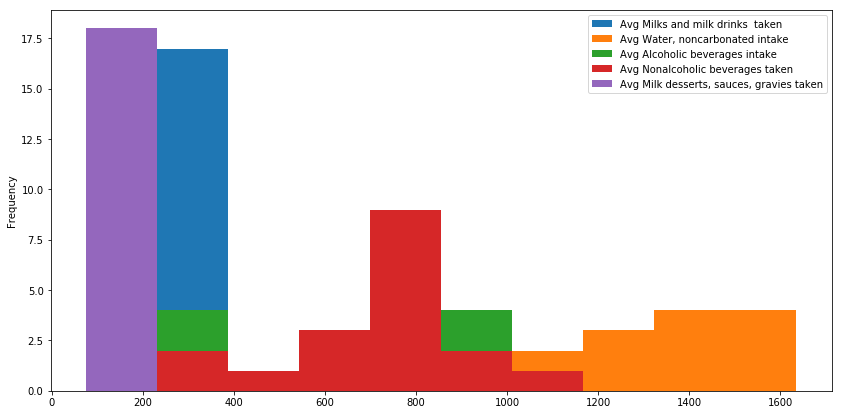

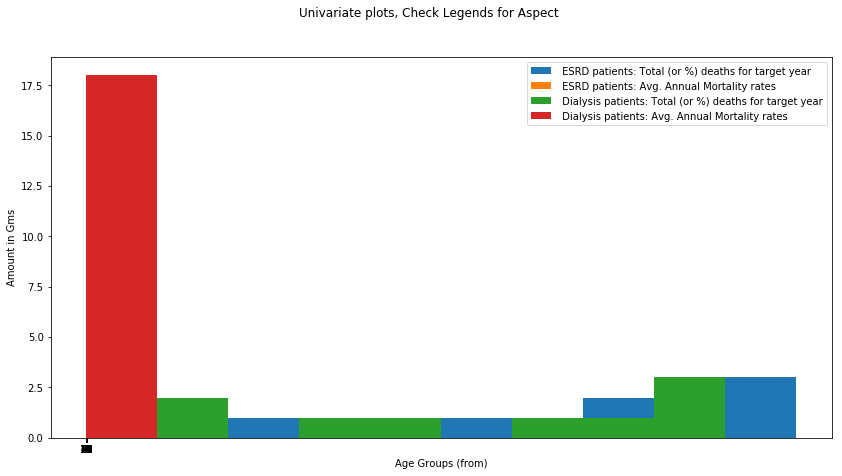

In [39]:
df1.plot.hist();
df2.plot.hist();
df3.plot.hist();
df4.plot.hist();
df5.plot.hist();
df6.plot.hist();
#df7.plot.hist();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

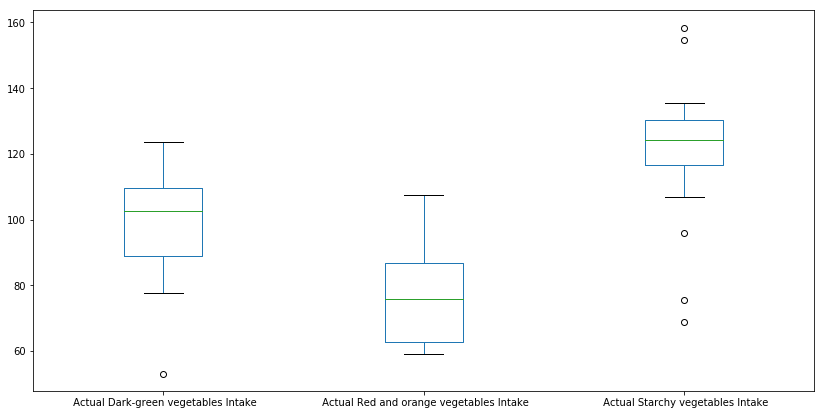

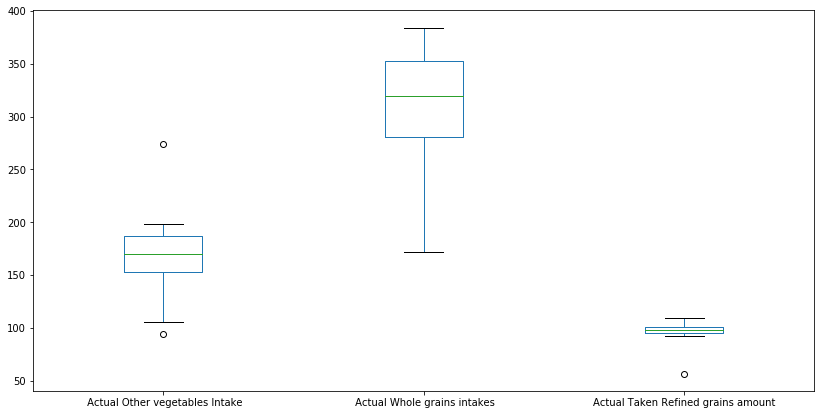

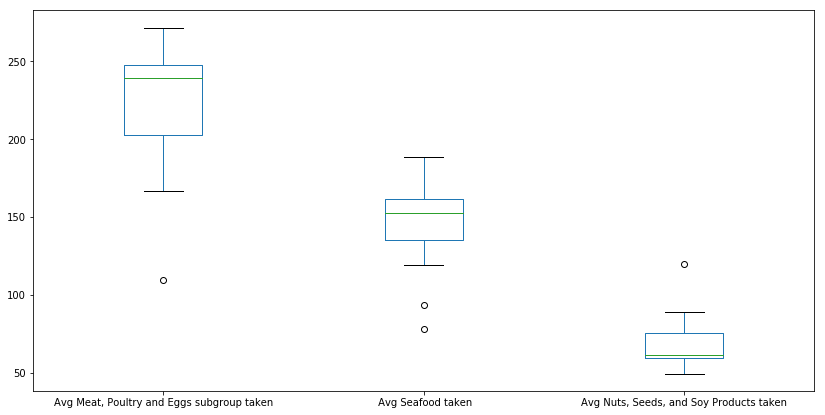

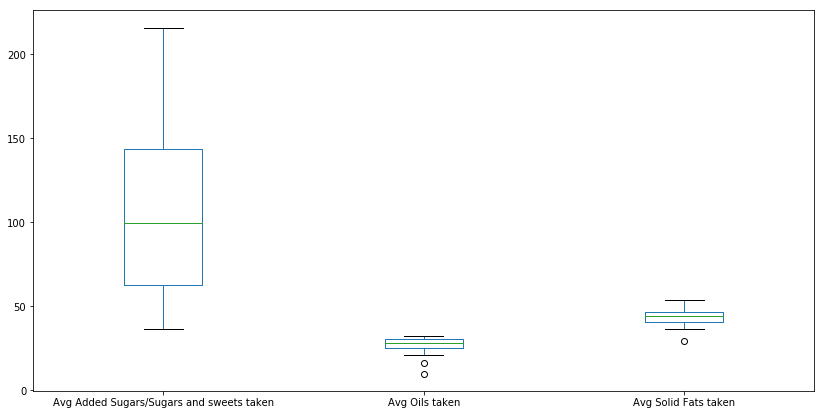

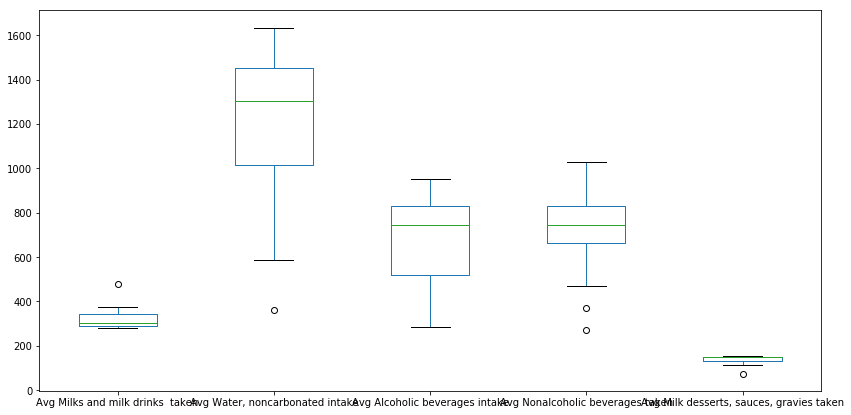

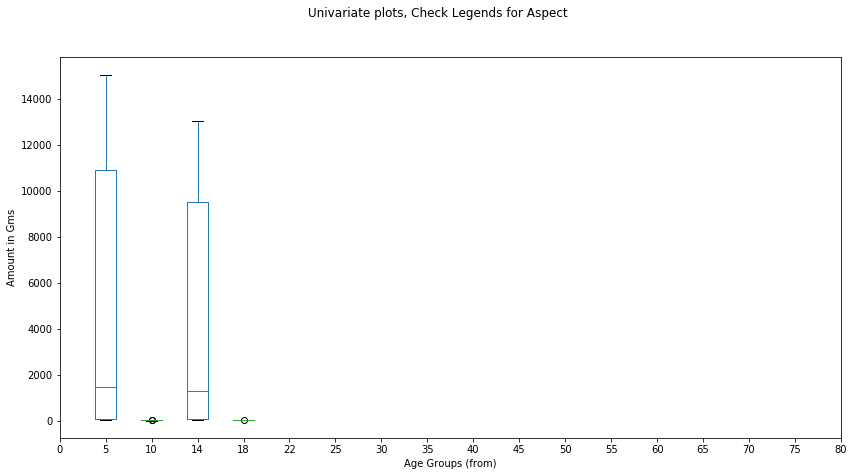

In [40]:
df1.plot.box();
df2.plot.box();
df3.plot.box();
df4.plot.box();
df5.plot.box();
df6.plot.box();
#df7.plot.box();


plt.xlabel('Age Groups (from)')
plt.ylabel('Amount in Gms')
plt.suptitle('Univariate plots, Check Legends for Aspect')
plt.xticks(range(len(df[' Age-group: To USRDS'])), df[' Age-group: From USRDS']);

In [41]:
df.corr()

Age-group: From USRDS  \
 Age-group: From USRDS                                            1.000000   
 Age-group: To USRDS                                              0.999792   
 Actual Dark-green vegetables Intake                              0.262012   
 Actual Red and orange vegetables Intake                          0.683169   
 Actual Starchy vegetables Intake                                 0.714624   
 Actual Other vegetables Intake                                   0.783931   
 Actual Whole grains intakes                                     -0.266557   
Actual Taken Refined grains amount                                0.265241   
Avg Meat, Poultry and Eggs subgroup taken                         0.209414   
 Avg Seafood taken                                                0.300719   
Avg Nuts, Seeds, and Soy Products taken                          -0.540453   
Avg Added Sugars/Sugars and sweets taken                         -0.565101   
Avg Oils taken                                                    0.217353   
Avg Solid Fats taken                                             -0.019013   
Avg Milks and milk drinks  taken                                 -0.798870   
Avg Water, noncarbonated intake                                   0.260378   
Avg Alcoholic beverages intake                                   -0.552699   
Avg Nonalcoholic beverages taken                                  0.629430   
Avg Milk desserts, sauces, gravies taken                          0.498137   
 ESRD patients: Total (or %) deaths for target ...                0.909230   
 ESRD patients: Avg. Annual Mortality rates                       0.854852   
 Dialysis patients: Total (or %) deaths for tar...                0.914521   
 Dialysis patients: Avg. Annual Mortality rates                   0.878499   

                                                     Age-group: To USRDS  \
 Age-group: From USRDS                                          0.999792   
 Age-group: To USRDS                                            1.000000   
 Actual Dark-green vegetables Intake                            0.253402   
 Actual Red and orange vegetables Intake                        0.686246   
 Actual Starchy vegetables Intake                               0.709969   
 Actual Other vegetables Intake                                 0.781700   
 Actual Whole grains intakes                                   -0.272342   
Actual Taken Refined grains amount                              0.258048   
Avg Meat, Poultry and Eggs subgroup taken                       0.202970   
 Avg Seafood taken                                              0.294852   
Avg Nuts, Seeds, and Soy Products taken                        -0.548836   
Avg Added Sugars/Sugars and sweets taken                       -0.571645   
Avg Oils taken                                                  0.207797   
Avg Solid Fats taken                                           -0.028615   
Avg Milks and milk drinks  taken                               -0.795101   
Avg Water, noncarbonated intake                                 0.256158   
Avg Alcoholic beverages intake                                 -0.553510   
Avg Nonalcoholic beverages taken                                0.628108   
Avg Milk desserts, sauces, gravies taken                        0.487622   
 ESRD patients: Total (or %) deaths for target ...              0.909458   
 ESRD patients: Avg. Annual Mortality rates                     0.854771   
 Dialysis patients: Total (or %) deaths for tar...              0.914720   
 Dialysis patients: Avg. Annual Mortality rates                 0.879277   

                                                     Actual Dark-green vegetables Intake  \
 Age-group: From USRDS                                                          0.262012   
 Age-group: To USRDS                                                            0.253402   
 Actual Dark-green vegetables Intake                                           

In [42]:
import numpy as np
import pandas as pd 
from subprocess import check_output

from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
%matplotlib inline


In [43]:
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()

Age-group: From USRDS  Age-group: To USRDS   Gender  \
0                      0                    4  Neutral   
1                      5                    9  Neutral   
2                     10                   13  Neutral   
3                     14                   17  Neutral   
4                     18                   21  Neutral   

   Actual Dark-green vegetables Intake  \
0                                53.14   
1                                77.63   
2                                89.90   
3                                84.75   
4                               118.68   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                    59.44                             68.81   
1                                    59.86                             75.65   
2                                    64.36                             95.91   
3                                    59.01                            106.73   
4                                    80.44                            130.53   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                           94.21                       171.86   
1                          106.01                       270.11   
2                          105.40                       317.60   
3                          127.41                       333.51   
4                          157.48                       357.26   

   Actual Taken Refined grains amount  \
0                               56.76   
1                               95.13   
2                              105.76   
3                              109.51   
4                               92.44   

   Avg Meat, Poultry and Eggs subgroup taken  \
0                                     109.77   
1                                     166.41   
2                                     197.84   
3                                     219.98   
4                                     247.67   

                        ...                        Avg Solid Fats taken  \
0                       ...                                       29.13   
1                       ...                                       38.78   
2                       ...                                       44.37   
3                       ...                                       44.35   
4                       ...                                       43.34   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                            478.86                           360.73   
1                            376.15                           588.17   
2                            367.35                           728.31   
3                            360.94                          1053.73   
4                            329.13                          1315.96   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                          360.00                            272.54   
1                          797.02                            368.94   
2                          654.79                            468.33   
3                          828.28                            563.57   
4                          892.47                            702.57   

   Avg Milk desserts, sauces, gravies taken  \
0                                     75.22   
1                                    111.76   
2                                    136.38   
3                                    153.97   
4                                    151.62   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   ESRD patients: Avg. Annual Mortality rates  \
0

In [44]:
df.corr()

Age-group: From USRDS  \
Age-group: From USRDS                                            1.000000   
Age-group: To USRDS                                              0.999792   
Actual Dark-green vegetables Intake                              0.262012   
Actual Red and orange vegetables Intake                          0.683169   
Actual Starchy vegetables Intake                                 0.714624   
Actual Other vegetables Intake                                   0.783931   
Actual Whole grains intakes                                     -0.266557   
Actual Taken Refined grains amount                               0.265241   
Avg Meat, Poultry and Eggs subgroup taken                        0.209414   
Avg Seafood taken                                                0.300719   
Avg Nuts, Seeds, and Soy Products taken                         -0.540453   
Avg Added Sugars/Sugars and sweets taken                        -0.565101   
Avg Oils taken                                                   0.217353   
Avg Solid Fats taken                                            -0.019013   
Avg Milks and milk drinks  taken                                -0.798870   
Avg Water, noncarbonated intake                                  0.260378   
Avg Alcoholic beverages intake                                  -0.552699   
Avg Nonalcoholic beverages taken                                 0.629430   
Avg Milk desserts, sauces, gravies taken                         0.498137   
ESRD patients: Total (or %) deaths for target year               0.909230   
ESRD patients: Avg. Annual Mortality rates                       0.854852   
Dialysis patients: Total (or %) deaths for targ...               0.914521   
Dialysis patients: Avg. Annual Mortality rates                   0.878499   

                                                    Age-group: To USRDS  \
Age-group: From USRDS                                          0.999792   
Age-group: To USRDS                                            1.000000   
Actual Dark-green vegetables Intake                            0.253402   
Actual Red and orange vegetables Intake                        0.686246   
Actual Starchy vegetables Intake                               0.709969   
Actual Other vegetables Intake                                 0.781700   
Actual Whole grains intakes                                   -0.272342   
Actual Taken Refined grains amount                             0.258048   
Avg Meat, Poultry and Eggs subgroup taken                      0.202970   
Avg Seafood taken                                              0.294852   
Avg Nuts, Seeds, and Soy Products taken                       -0.548836   
Avg Added Sugars/Sugars and sweets taken                      -0.571645   
Avg Oils taken                                                 0.207797   
Avg Solid Fats taken                                          -0.028615   
Avg Milks and milk drinks  taken                              -0.795101   
Avg Water, noncarbonated intake                                0.256158   
Avg Alcoholic beverages intake                                -0.553510   
Avg Nonalcoholic beverages taken                               0.628108   
Avg Milk desserts, sauces, gravies taken                       0.487622   
ESRD patients: Total (or %) deaths for target year             0.909458   
ESRD patients: Avg. Annual Mortality rates                     0.854771   
Dialysis patients: Total (or %) deaths for targ...             0.914720   
Dialysis patients: Avg. Annual Mortality rates                 0.879277   

                                                    Actual Dark-green vegetables Intake  \
Age-group: From USRDS                                                          0.262012   
Age-group: To USRDS                                                            0.253402   
Actual Dark-green vegetables Intake                                            1.000000   
Actual Red and orange vegetables Intak

Age-group: From USRDS	Age-group: To USRDS	Actual Dark-green vegetables Intake	Actual Red and orange vegetables Intake	Actual Starchy vegetables Intake	Actual Other vegetables Intake	Actual Whole grains intakes	Actual Taken Refined grains amount	Avg Meat, Poultry and Eggs subgroup taken	Avg Seafood taken	...	Avg Solid Fats taken	Avg Milks and milk drinks taken	Avg Water, noncarbonated intake	Avg Alcoholic beverages intake	Avg Nonalcoholic beverages taken	Avg Milk desserts, sauces, gravies taken	ESRD patients: Total (or %) deaths for target year	ESRD patients: Avg. Annual Mortality rates	Dialysis patients: Total (or %) deaths for target year	Dialysis patients: Avg. Annual Mortality rates
ESRD patients: Total (or %) deaths for target year	0.909230	0.909458	0.056973	0.572518	0.517307	0.542376	-0.469825	0.112844	-0.036558	0.107024	...	-0.236728	-0.598140	-0.023290	-0.738501	0.384077	0.353425	1.000000	0.833280	0.999627	0.868295
ESRD patients: Avg. Annual Mortality rates	0.854852	0.854771	-0.082390	0.545127	0.444551	0.676325	-0.609984	0.057939	-0.216943	-0.113325	...	-0.365416	-0.461741	-0.150719	-0.786412	0.192810	0.336838	0.833280	1.000000	0.847302	0.995724
Dialysis patients: Total (or %) deaths for target year	0.914521	0.914720	0.054157	0.577456	0.518309	0.554746	-0.478563	0.114916	-0.042973	0.100156	...	-0.241894	-0.598720	-0.028184	-0.744098	0.381084	0.357477	0.999627	0.847302	1.000000	0.880661
Dialysis patients: Avg. Annual Mortality rates	0.878499	0.879277	-0.076082	0.564846	0.453687	0.675571	-0.613042	0.035448	-0.205311	-0.097894	...	-0.369415	-0.485633	-0.136271	-0.791673	0.225472	0.314988	0.868295	0.995724	0.880661	1.000000
    

In [45]:
len(df.columns)

24

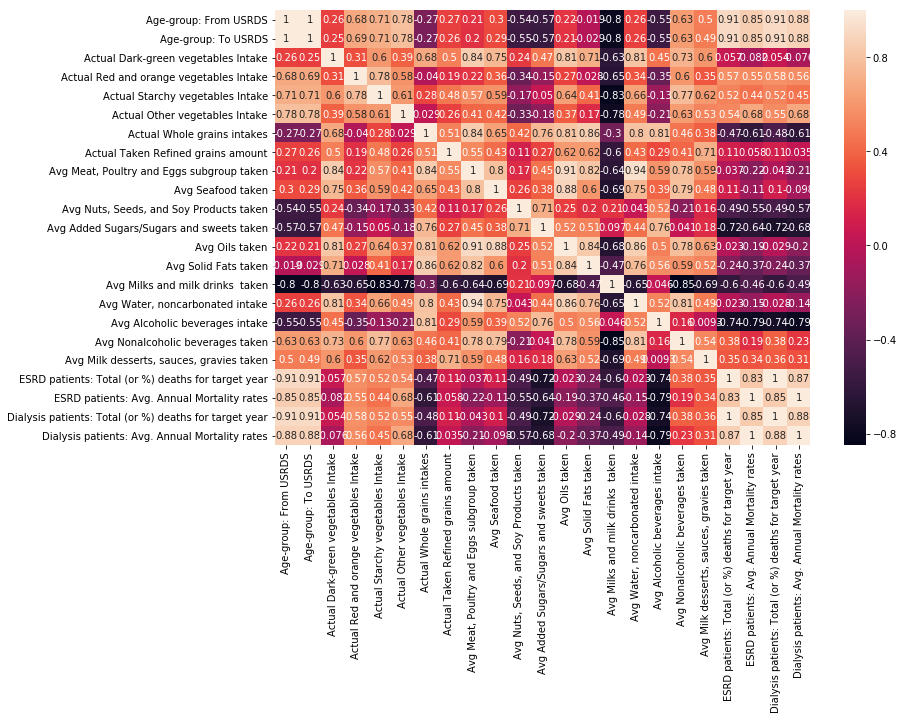

In [46]:
plt.figure(figsize=(12, 8))

corr = df.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [49]:
df = df.drop(['Gender'], axis=1)

In [50]:
df_normalized = (df - df.mean())/ (df.max() - df.min())
df_normalized.head()

Age-group: From USRDS  Age-group: To USRDS  \
0              -0.485417            -0.481944   
1              -0.422917            -0.419444   
2              -0.360417            -0.369444   
3              -0.310417            -0.319444   
4              -0.260417            -0.269444   

   Actual Dark-green vegetables Intake  \
0                            -0.652719   
1                            -0.305146   
2                            -0.131004   
3                            -0.204095   
4                             0.277455   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                -0.359705                         -0.576849   
1                                -0.351025                         -0.500527   
2                                -0.258031                         -0.274461   
3                                -0.368591                         -0.153729   
4                                 0.074269                          0.111836   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                       -0.402956                    -0.643337   
1                       -0.337302                    -0.180592   
2                       -0.340696                     0.043080   
3                       -0.218235                     0.118014   
4                       -0.050928                     0.229873   

   Actual Taken Refined grains amount  \
0                           -0.744739   
1                           -0.017346   
2                            0.184171   
3                            0.255261   
4                           -0.068341   

   Avg Meat, Poultry and Eggs subgroup taken  Avg Seafood taken  \
0                                  -0.717791          -0.627500   
1                                  -0.367859          -0.486845   
2                                  -0.173679           0.038411   
3                                  -0.036894          -0.141058   
4                                   0.134180           0.372500   

                        ...                        Avg Solid Fats taken  \
0                       ...                                   -0.570441   
1                       ...                                   -0.181641   
2                       ...                                    0.043580   
3                       ...                                    0.042775   
4                       ...                                    0.002082   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                          0.780708                        -0.666611   
1                          0.265225                        -0.488078   
2                          0.221060                        -0.378073   
3                          0.188889                        -0.122629   
4                          0.029240                         0.083213   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                       -0.453602                         -0.576524   
1                        0.198744                         -0.449188   
2                       -0.013565                         -0.317902   
3                        0.245407                         -0.192098   
4                        0.341224                         -0.008491   

   Avg Milk desserts, sauces, gravies taken  \
0                                 -0.780168   
1                                 -0.325747   
2                                 -0.019566   
3                                  0.199187   
4                                  0.169962   

   ESRD patients: Total (or %) deaths for target year  \
0                                          -0.327056    
1                                          -0.328351    
2                                          -0.328650    
3                                          -0.328417    
4                                          -0.32

In [51]:
df_normalized.corr()

Age-group: From USRDS  \
Age-group: From USRDS                                            1.000000   
Age-group: To USRDS                                              0.999792   
Actual Dark-green vegetables Intake                              0.262012   
Actual Red and orange vegetables Intake                          0.683169   
Actual Starchy vegetables Intake                                 0.714624   
Actual Other vegetables Intake                                   0.783931   
Actual Whole grains intakes                                     -0.266557   
Actual Taken Refined grains amount                               0.265241   
Avg Meat, Poultry and Eggs subgroup taken                        0.209414   
Avg Seafood taken                                                0.300719   
Avg Nuts, Seeds, and Soy Products taken                         -0.540453   
Avg Added Sugars/Sugars and sweets taken                        -0.565101   
Avg Oils taken                                                   0.217353   
Avg Solid Fats taken                                            -0.019013   
Avg Milks and milk drinks  taken                                -0.798870   
Avg Water, noncarbonated intake                                  0.260378   
Avg Alcoholic beverages intake                                  -0.552699   
Avg Nonalcoholic beverages taken                                 0.629430   
Avg Milk desserts, sauces, gravies taken                         0.498137   
ESRD patients: Total (or %) deaths for target year               0.909230   
ESRD patients: Avg. Annual Mortality rates                       0.854852   
Dialysis patients: Total (or %) deaths for targ...               0.914521   
Dialysis patients: Avg. Annual Mortality rates                   0.878499   

                                                    Age-group: To USRDS  \
Age-group: From USRDS                                          0.999792   
Age-group: To USRDS                                            1.000000   
Actual Dark-green vegetables Intake                            0.253402   
Actual Red and orange vegetables Intake                        0.686246   
Actual Starchy vegetables Intake                               0.709969   
Actual Other vegetables Intake                                 0.781700   
Actual Whole grains intakes                                   -0.272342   
Actual Taken Refined grains amount                             0.258048   
Avg Meat, Poultry and Eggs subgroup taken                      0.202970   
Avg Seafood taken                                              0.294852   
Avg Nuts, Seeds, and Soy Products taken                       -0.548836   
Avg Added Sugars/Sugars and sweets taken                      -0.571645   
Avg Oils taken                                                 0.207797   
Avg Solid Fats taken                                          -0.028615   
Avg Milks and milk drinks  taken                              -0.795101   
Avg Water, noncarbonated intake                                0.256158   
Avg Alcoholic beverages intake                                -0.553510   
Avg Nonalcoholic beverages taken                               0.628108   
Avg Milk desserts, sauces, gravies taken                       0.487622   
ESRD patients: Total (or %) deaths for target year             0.909458   
ESRD patients: Avg. Annual Mortality rates                     0.854771   
Dialysis patients: Total (or %) deaths for targ...             0.914720   
Dialysis patients: Avg. Annual Mortality rates                 0.879277   

                                                    Actual Dark-green vegetables Intake  \
Age-group: From USRDS                                                          0.262012   
Age-group: To USRDS                                                            0.253402   
Actual Dark-green vegetables Intake                                            1.000000   
Actual Red and orange vegetables Intak

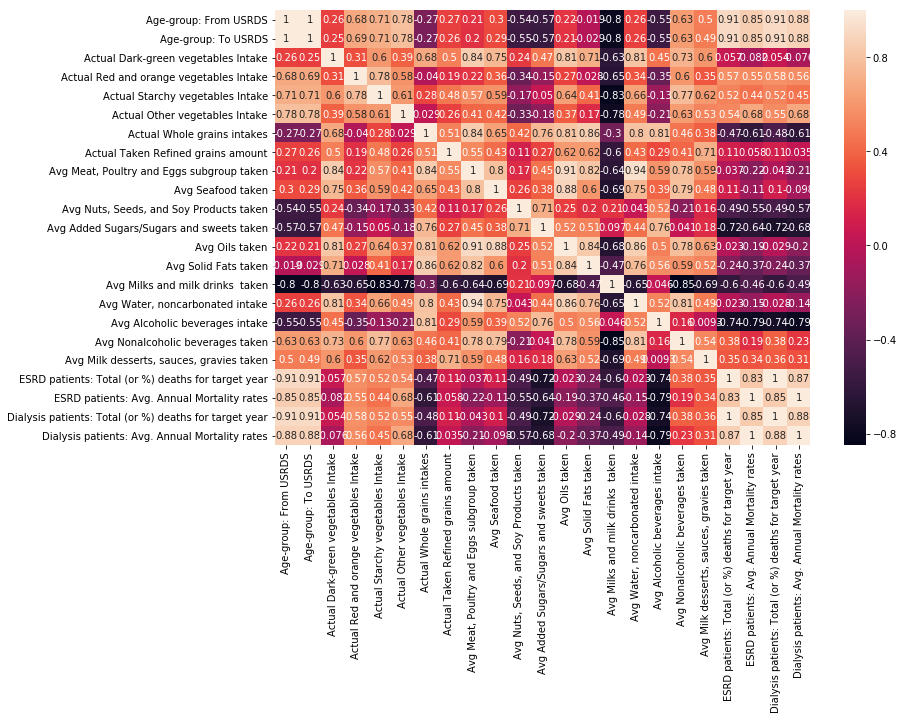

In [52]:
plt.figure(figsize=(12, 8))

corr = df_normalized.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

# Bivariate

Bivariate plots on actual amount intake and target variables. will be saved in bivariate_food_subgroup.png. The correlation pattern can be checked in the image saved

The correlation are shown in heatmaps and Pearson's correlations. Now linearity and non-linearity can be seen using the Bivariate plots below. 

The plots show similarity with correlations

In [53]:
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()

Age-group: From USRDS  Age-group: To USRDS   Gender  \
0                      0                    4  Neutral   
1                      5                    9  Neutral   
2                     10                   13  Neutral   
3                     14                   17  Neutral   
4                     18                   21  Neutral   

   Actual Dark-green vegetables Intake  \
0                                53.14   
1                                77.63   
2                                89.90   
3                                84.75   
4                               118.68   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                    59.44                             68.81   
1                                    59.86                             75.65   
2                                    64.36                             95.91   
3                                    59.01                            106.73   
4                                    80.44                            130.53   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                           94.21                       171.86   
1                          106.01                       270.11   
2                          105.40                       317.60   
3                          127.41                       333.51   
4                          157.48                       357.26   

   Actual Taken Refined grains amount  \
0                               56.76   
1                               95.13   
2                              105.76   
3                              109.51   
4                               92.44   

   Avg Meat, Poultry and Eggs subgroup taken  \
0                                     109.77   
1                                     166.41   
2                                     197.84   
3                                     219.98   
4                                     247.67   

                        ...                        Avg Solid Fats taken  \
0                       ...                                       29.13   
1                       ...                                       38.78   
2                       ...                                       44.37   
3                       ...                                       44.35   
4                       ...                                       43.34   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                            478.86                           360.73   
1                            376.15                           588.17   
2                            367.35                           728.31   
3                            360.94                          1053.73   
4                            329.13                          1315.96   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                          360.00                            272.54   
1                          797.02                            368.94   
2                          654.79                            468.33   
3                          828.28                            563.57   
4                          892.47                            702.57   

   Avg Milk desserts, sauces, gravies taken  \
0                                     75.22   
1                                    111.76   
2                                    136.38   
3                                    153.97   
4                                    151.62   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   ESRD patients: Avg. Annual Mortality rates  \
0

In [57]:
df.columns

Index(['Actual Dark-green vegetables Intake',
       'Actual Red and orange vegetables Intake',
       'Actual Starchy vegetables Intake', 'Actual Other vegetables Intake',
       'Actual Whole grains intakes', 'Actual Taken Refined grains amount',
       'Avg Meat, Poultry and Eggs subgroup taken', 'Avg Seafood taken',
       'Avg Nuts, Seeds, and Soy Products taken',
       'Avg Added Sugars/Sugars and sweets taken', 'Avg Oils taken',
       'Avg Solid Fats taken', 'Avg Milks and milk drinks  taken',
       'Avg Water, noncarbonated intake', 'Avg Alcoholic beverages intake',
       'Avg Nonalcoholic beverages taken',
       'Avg Milk desserts, sauces, gravies taken',
       'ESRD patients: Total (or %) deaths for target year',
       'ESRD patients: Avg. Annual Mortality rates',
       'Dialysis patients: Total (or %) deaths for target year',
       'Dialysis patients: Avg. Annual Mortality rates'],
      dtype='object')

In [58]:
# on actual amounts
# plt.figure(figsize=(16, 300))
#df = df.drop(['Gender', 'Age-group: From USRDS', 'Age-group: To USRDS'], axis=1)
sns.pairplot(df, vars=df.columns, size=5, kind='reg'); # diag_kind='kde',
plt.title('Bivariate Plot, Food Subgroups');
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/bivariate_food_subgroup' + '.png')            
plt.show()

# Bivariate plots with few variables at each plot

'ESRD patients: Avg. Annual Mortality rates'  is used as the target variable

In [63]:
df1 = df.iloc[:,3:6]
df1['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']


df2 = df.iloc[:,6:9]
df2['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

df3 = df.iloc[:,9:12]
df3['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

df4 = df.iloc[:,12:15]
df4['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']


df5 = df.iloc[:,15:17]
df5['ESRD patients: Avg. Annual Mortality rates'] = df['ESRD patients: Avg. Annual Mortality rates']

#df6 = df.iloc[:,18:21]
df7 = df.iloc[:,17:24]
#df7[' ESRD patients: Avg. Annual Mortality rates'] = df[' ESRD patients: Avg. Annual Mortality rates']


<Figure size 1008x1008 with 0 Axes>

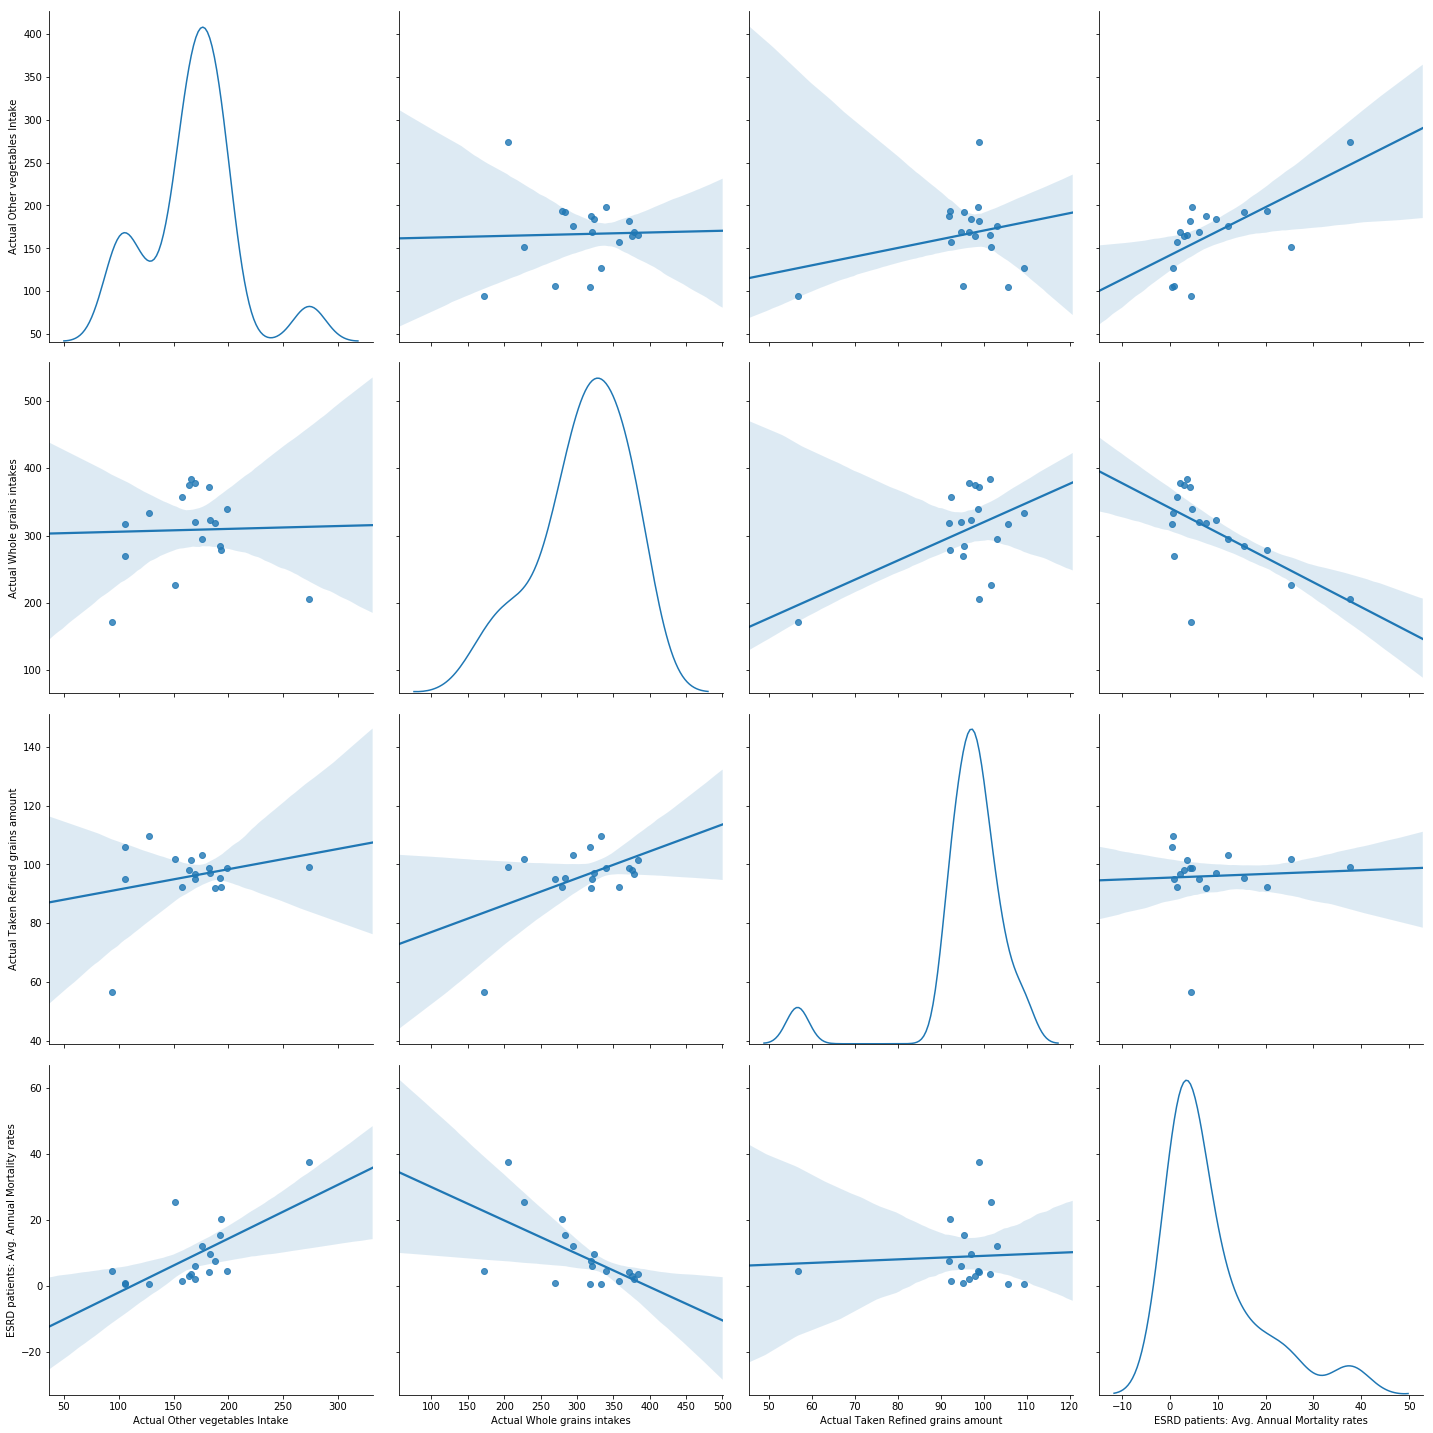

In [64]:
plt.figure(figsize=(14, 14))
sns.pairplot(df1, diag_kind='kde', kind='reg', size=5);

#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=70);
#plt.xticks(rotation=70);
#g.set_xlabels(g.get_xlabels(), rotation=90)
#plt.xlabel(range(len(df1.columns)), df1.columns, rotation=90);
# plt.setyylable('dd', rotation=90);

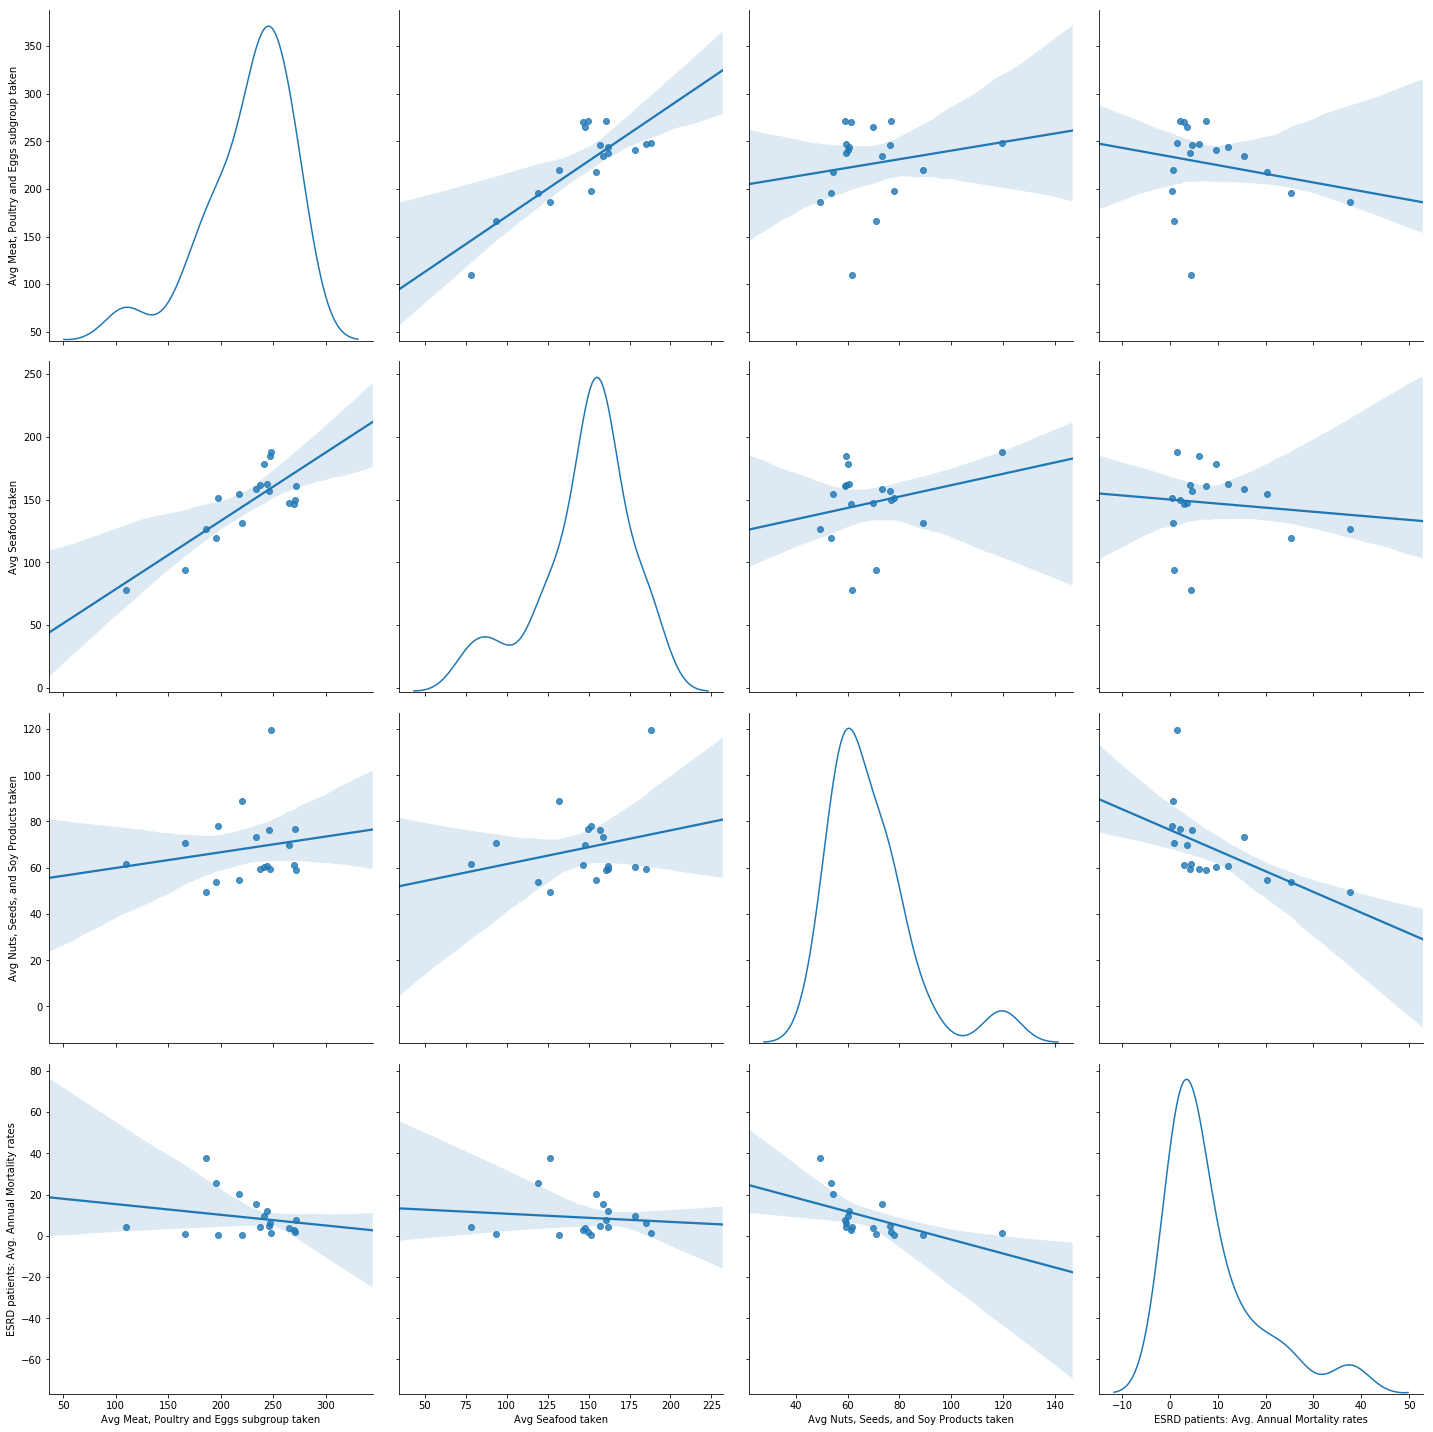

In [65]:
sns.pairplot(df2, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

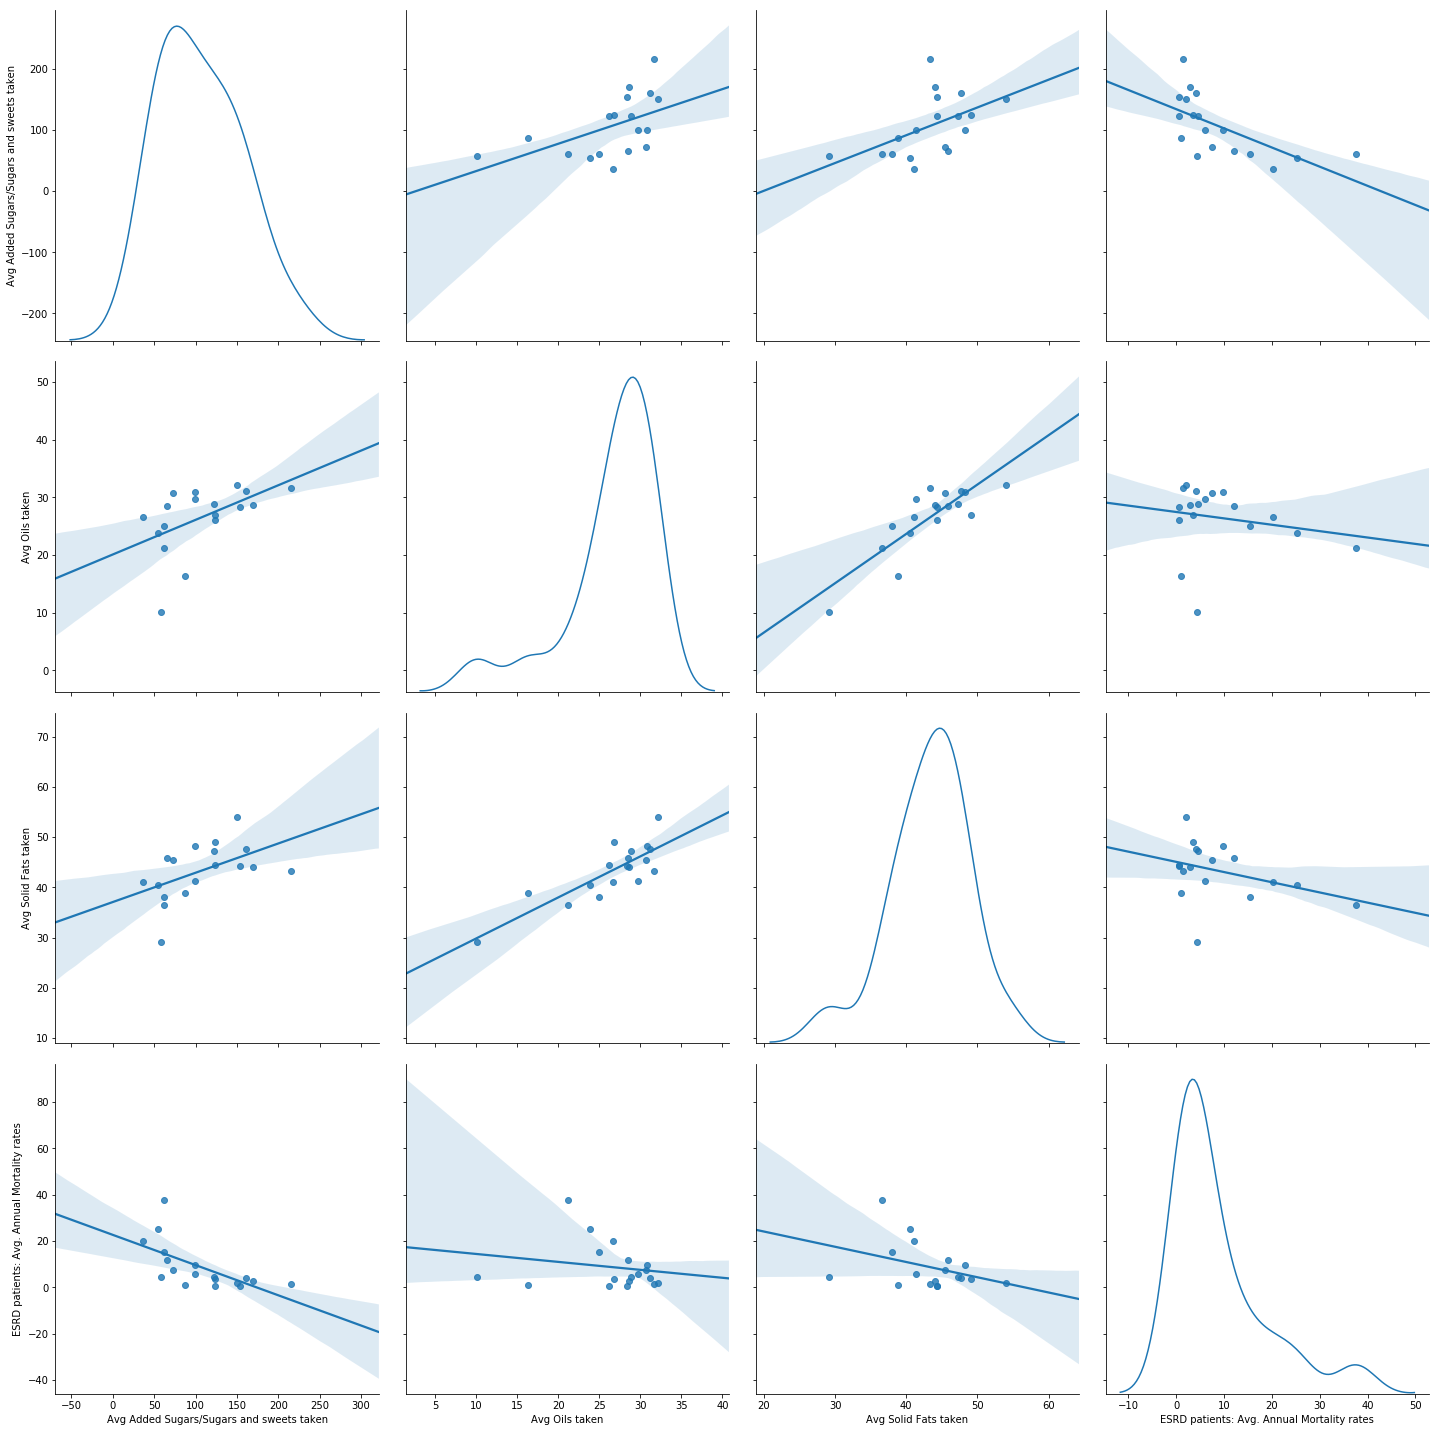

In [66]:
sns.pairplot(df3, diag_kind='kde', kind='reg', size=5);

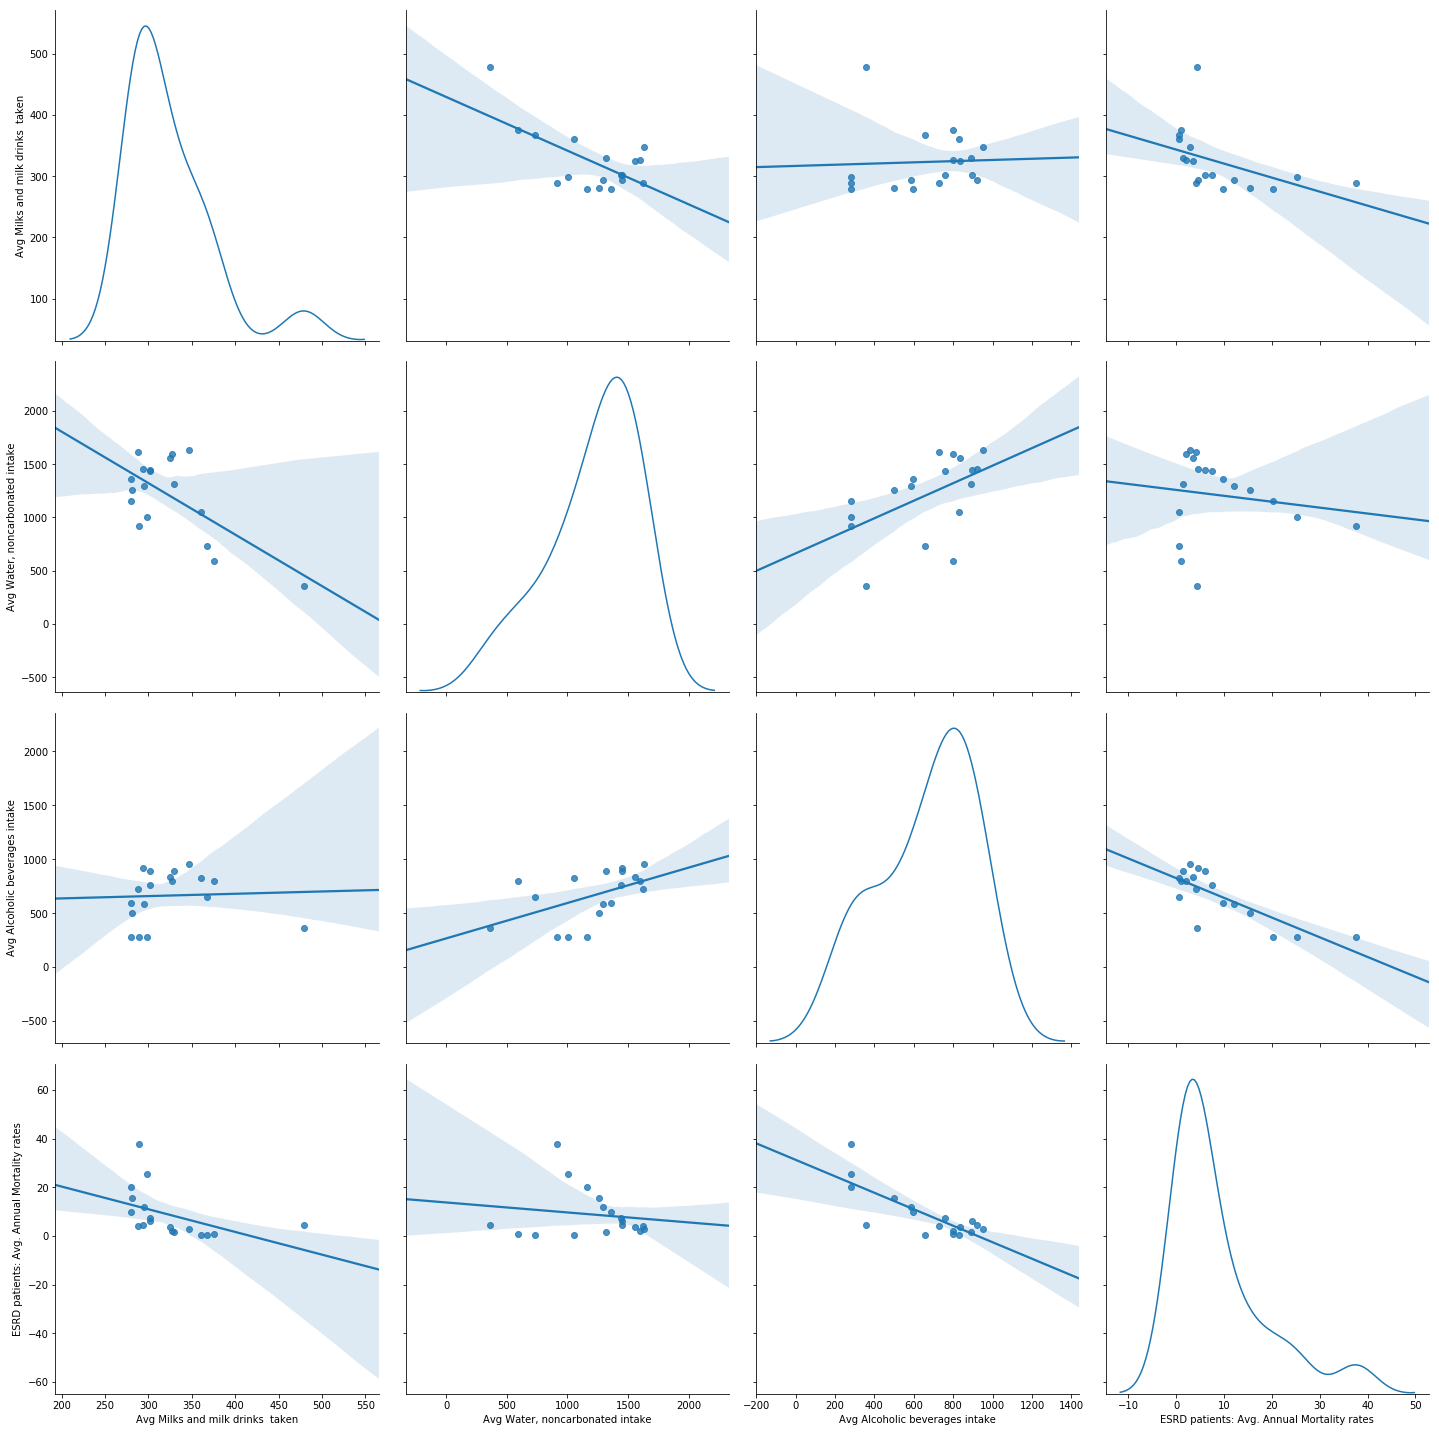

In [67]:
sns.pairplot(df4, diag_kind='kde', kind='reg', size=5);

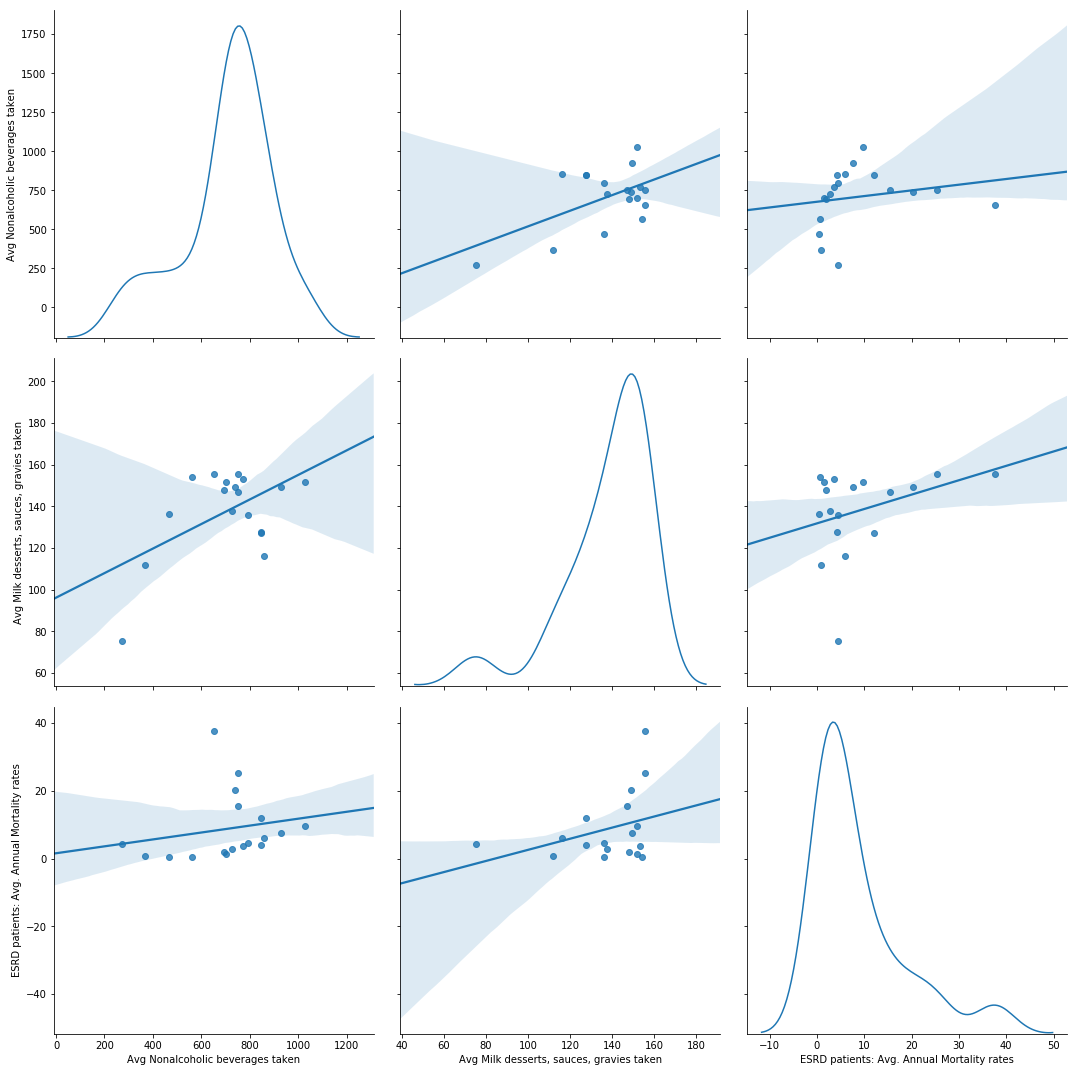

In [68]:

sns.pairplot(df5, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

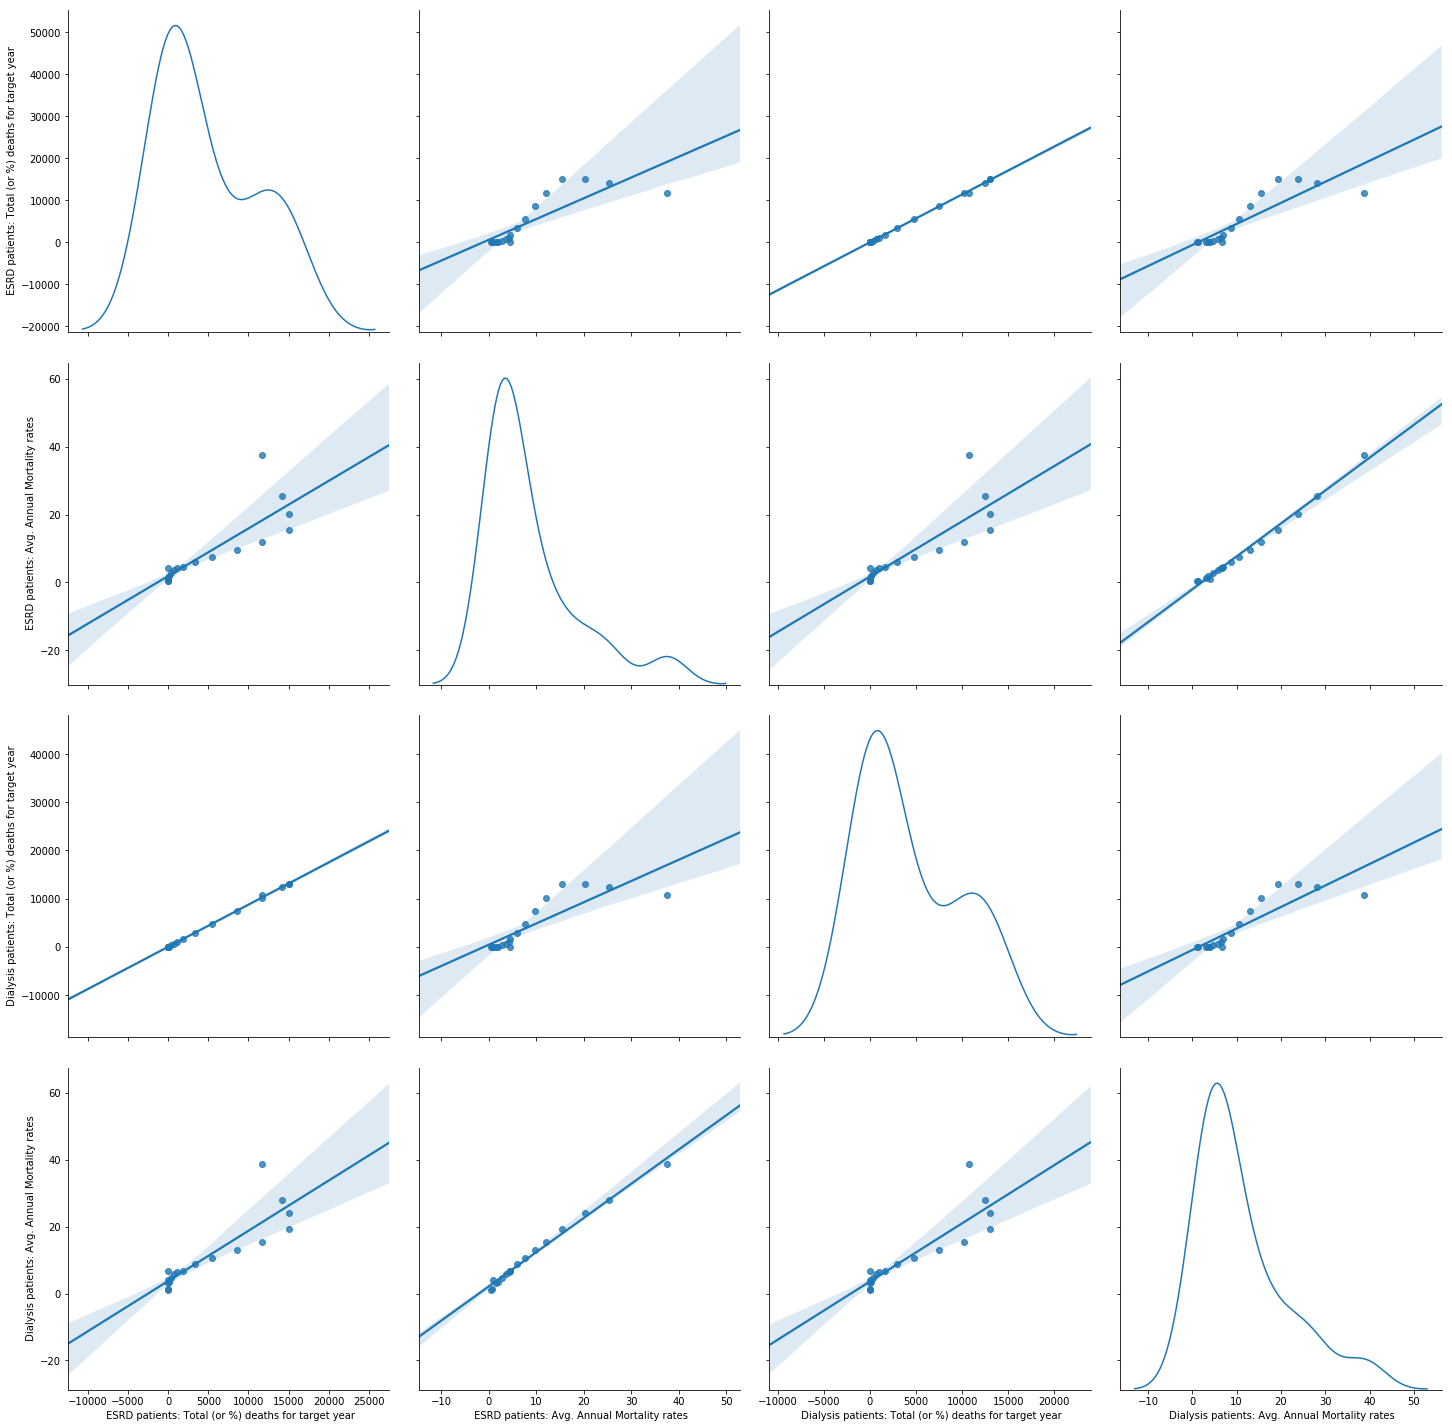

In [69]:
sns.pairplot(df6, diag_kind='kde', kind='reg', size=5);
#plt.title('Bivariate Plot, All Actual Taken Variables, Total ESRD target variable')
#plt.yticks(rotation=90);

# PCA: Just experiment and Exploration only:
# Will reuse some methods from a github project and apply on our data


In [70]:
#steps followed from ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
df = pd.read_csv('./data-for-code/no-empty-cell-mortality_subgroup_data_june_9th_gender_neutral-based_data_after_processing.csv')
df.head()



Age-group: From USRDS  Age-group: To USRDS   Gender  \
0                      0                    4  Neutral   
1                      5                    9  Neutral   
2                     10                   13  Neutral   
3                     14                   17  Neutral   
4                     18                   21  Neutral   

   Actual Dark-green vegetables Intake  \
0                                53.14   
1                                77.63   
2                                89.90   
3                                84.75   
4                               118.68   

   Actual Red and orange vegetables Intake  Actual Starchy vegetables Intake  \
0                                    59.44                             68.81   
1                                    59.86                             75.65   
2                                    64.36                             95.91   
3                                    59.01                            106.73   
4                                    80.44                            130.53   

   Actual Other vegetables Intake  Actual Whole grains intakes  \
0                           94.21                       171.86   
1                          106.01                       270.11   
2                          105.40                       317.60   
3                          127.41                       333.51   
4                          157.48                       357.26   

   Actual Taken Refined grains amount  \
0                               56.76   
1                               95.13   
2                              105.76   
3                              109.51   
4                               92.44   

   Avg Meat, Poultry and Eggs subgroup taken  \
0                                     109.77   
1                                     166.41   
2                                     197.84   
3                                     219.98   
4                                     247.67   

                        ...                        Avg Solid Fats taken  \
0                       ...                                       29.13   
1                       ...                                       38.78   
2                       ...                                       44.37   
3                       ...                                       44.35   
4                       ...                                       43.34   

   Avg Milks and milk drinks  taken  Avg Water, noncarbonated intake  \
0                            478.86                           360.73   
1                            376.15                           588.17   
2                            367.35                           728.31   
3                            360.94                          1053.73   
4                            329.13                          1315.96   

   Avg Alcoholic beverages intake  Avg Nonalcoholic beverages taken  \
0                          360.00                            272.54   
1                          797.02                            368.94   
2                          654.79                            468.33   
3                          828.28                            563.57   
4                          892.47                            702.57   

   Avg Milk desserts, sauces, gravies taken  \
0                                     75.22   
1                                    111.76   
2                                    136.38   
3                                    153.97   
4                                    151.62   

   ESRD patients: Total (or %) deaths for target year  \
0                                               32.0    
1                                               12.5    
2                                                8.0    
3                                               11.5    
4                                               57.0    

   ESRD patients: Avg. Annual Mortality rates  \
0

In [72]:
df_pca = df.drop(['Age-group: From USRDS', 'Age-group: To USRDS', 'Gender'],axis=1)
import sklearn 
from sklearn import preprocessing
import numpy as np
standardisedX = sklearn.preprocessing.scale(df_pca)
standardisedX = pd.DataFrame(standardisedX, index=df_pca.index, columns=df_pca.columns)
standardisedX.apply(np.mean)

Actual Dark-green vegetables Intake                      -1.727014e-16
Actual Red and orange vegetables Intake                  -3.083953e-16
Actual Starchy vegetables Intake                          5.242720e-17
Actual Other vegetables Intake                            2.220446e-16
Actual Whole grains intakes                               1.258253e-15
Actual Taken Refined grains amount                       -1.619075e-15
Avg Meat, Poultry and Eggs subgroup taken                 3.577385e-16
Avg Seafood taken                                         2.158767e-16
Avg Nuts, Seeds, and Soy Products taken                   6.167906e-16
Avg Added Sugars/Sugars and sweets taken                  2.652199e-16
Avg Oils taken                                           -2.713879e-16
Avg Solid Fats taken                                     -1.233581e-16
Avg Milks and milk drinks  taken                          2.405483e-16
Avg Water, noncarbonated intake                           0.000000e+00
Avg Al

In [73]:
standardisedX.apply(np.std)

Actual Dark-green vegetables Intake                       1.0
Actual Red and orange vegetables Intake                   1.0
Actual Starchy vegetables Intake                          1.0
Actual Other vegetables Intake                            1.0
Actual Whole grains intakes                               1.0
Actual Taken Refined grains amount                        1.0
Avg Meat, Poultry and Eggs subgroup taken                 1.0
Avg Seafood taken                                         1.0
Avg Nuts, Seeds, and Soy Products taken                   1.0
Avg Added Sugars/Sugars and sweets taken                  1.0
Avg Oils taken                                            1.0
Avg Solid Fats taken                                      1.0
Avg Milks and milk drinks  taken                          1.0
Avg Water, noncarbonated intake                           1.0
Avg Alcoholic beverages intake                            1.0
Avg Nonalcoholic beverages taken                          1.0
Avg Milk

In [74]:
from sklearn import decomposition
pca = decomposition.PCA().fit(standardisedX)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [75]:
#ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame( list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [76]:
summary = pca_summary(pca, standardisedX)

Importance of components:


sdev                varprop               cumprop
     Standard deviation Proportion of Variance Cumulative Proportion
PC1        3.025508e+00           4.358905e-01              0.435891
PC2        2.702769e+00           3.478552e-01              0.783746
PC3        1.079007e+00           5.544077e-02              0.839186
PC4        9.229833e-01           4.056658e-02              0.879753
PC5        7.996784e-01           3.045169e-02              0.910205
PC6        7.554382e-01           2.717557e-02              0.937380
PC7        5.952533e-01           1.687269e-02              0.954253
PC8        5.069576e-01           1.223838e-02              0.966491
PC9        4.285763e-01           8.746555e-03              0.975238
PC10       4.050162e-01           7.811338e-03              0.983049
PC11       3.618492e-01           6.234992e-03              0.989284
PC12       3.194400e-01           4.859139e-03              0.994143
PC13       2.130268e-01           2.160972e-03              0.996304
PC14       2.060893e-01           2.022515e-03              0.998327
PC15       1.570405e-01           1.174367e-03              0.999501
PC16       9.969771e-02           4.733159e-04              0.999975
PC17       2.310211e-02           2.541465e-05              1.000000
PC18       2.368008e-16           4.242995e-34              1.000000

In [77]:
# First Five component can define over 91% 

In [78]:
np.sum(summary.sdev**2)

Standard deviation    21.0
dtype: float64

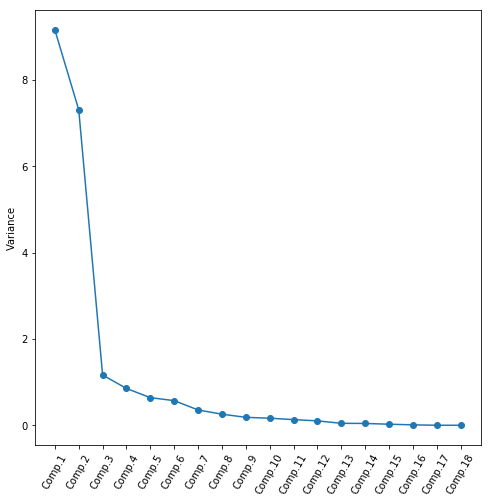

In [79]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

plt.rcParams['figure.figsize'] = 8, 8   
screeplot(pca, standardisedX)

In [80]:
# comp 3 to comp 4 is the most change for slope
# first three or at best first 4 can be retained

In [81]:
summary.sdev**2

Standard deviation
PC1         9.153701e+00
PC2         7.304959e+00
PC3         1.164256e+00
PC4         8.518981e-01
PC5         6.394855e-01
PC6         5.706869e-01
PC7         3.543265e-01
PC8         2.570060e-01
PC9         1.836777e-01
PC10        1.640381e-01
PC11        1.309348e-01
PC12        1.020419e-01
PC13        4.538042e-02
PC14        4.247281e-02
PC15        2.466171e-02
PC16        9.939633e-03
PC17        5.337077e-04
PC18        5.607462e-32

In [82]:
pca.components_[0]

array([-0.29107597, -0.14117176, -0.2469594 , -0.17548548, -0.25393257,
       -0.21937776, -0.30982985, -0.28356691, -0.0489583 , -0.14248964,
       -0.31487843, -0.26718644,  0.26503007, -0.30282359, -0.14339706,
       -0.28353417, -0.23557178, -0.03748978,  0.01047719, -0.03648573,
        0.00854257])

In [83]:
np.sum(pca.components_[0]**2)

0.9999999999999997

In [84]:
# ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code, I am using this as (similar to) a library function
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [85]:
calcpc(standardisedX, pca.components_[0])

array([ 9.84586938,  4.93557236,  1.7245801 ,  0.51665275, -2.23906467,
       -2.37480972, -1.57908354, -1.82857302, -2.5779144 , -1.48209187,
       -1.18821375, -1.74464742, -2.54901027, -1.14542236, -0.61057954,
        0.39468681,  0.5706472 ,  1.33140195])

In [86]:
pca.transform(standardisedX)[:, 0]

array([ 9.84586938,  4.93557236,  1.7245801 ,  0.51665275, -2.23906467,
       -2.37480972, -1.57908354, -1.82857302, -2.5779144 , -1.48209187,
       -1.18821375, -1.74464742, -2.54901027, -1.14542236, -0.61057954,
        0.39468681,  0.5706472 ,  1.33140195])

In [87]:
pca.components_[1]

array([-0.02860489,  0.23507636,  0.18185158,  0.2330107 , -0.22042602,
        0.00767883, -0.06542032, -0.01520477, -0.23666744, -0.27940994,
       -0.05868199, -0.12681133, -0.19603246, -0.03891072, -0.3029888 ,
        0.11437419,  0.10127936,  0.34621579,  0.35198445,  0.34906457,
        0.3593115 ])

In [88]:
np.sum(pca.components_[1]**2)

1.0000000000000009

In [89]:
# for following code : Classes will/might be defined such as like High, low, neutral mortality in final work

In [91]:
sorted(standardisedX['ESRD patients: Avg. Annual Mortality rates'])

[-0.8508781732392158,
 -0.8447380350810376,
 -0.807897206131968,
 -0.7541709972479083,
 -0.6983980756444559,
 -0.6114127850702639,
 -0.535172736272884,
 -0.4788881364895833,
 -0.45330422749717386,
 -0.4405122730009692,
 -0.29059056630545005,
 -0.13094697419281548,
 0.08753960860236082,
 0.32905170949070545,
 0.6810862972262587,
 1.1635988208231,
 1.6916507024264298,
 2.9439830476048696]

In [93]:
y = standardisedX['ESRD patients: Avg. Annual Mortality rates'] > 0.5
y

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
Name: ESRD patients: Avg. Annual Mortality rates, dtype: bool

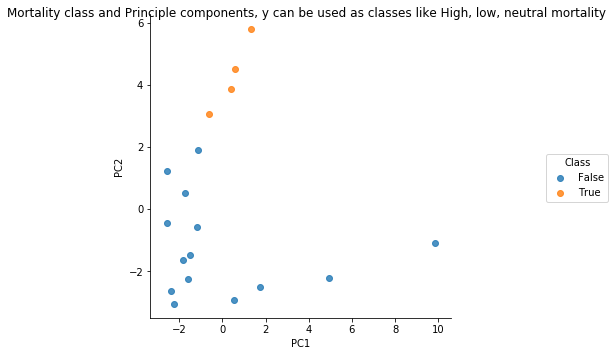

In [94]:
# # ref: https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
# not my code from the URL above, using this as a library function
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

#y = df_pca[' ESRD patients: Total (or %) deaths for target year']
#y = np.std(pca.transform(standardisedX), axis=0)**2
pca_scatter(pca, standardisedX, y)

# y can be used as classes like High, low, neutral mortality

plt.suptitle('Mortality class and Principle components, y can be used as classes like High, low, neutral mortality');

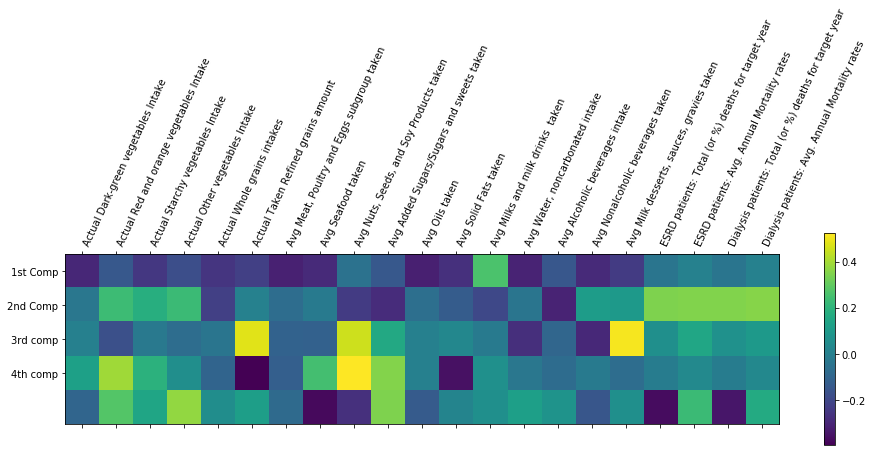

In [95]:
# reference: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21



#keep four components
pca_components_cont = pca.components_[0:5]

plt.matshow(pca_components_cont, cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp', '3rd comp', '4th comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(len(df_pca.columns)), df_pca.columns, rotation=65,ha='left')

plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_sub_groups_what_contributes_to_PCA_components' + '.png')            
plt.show()# 

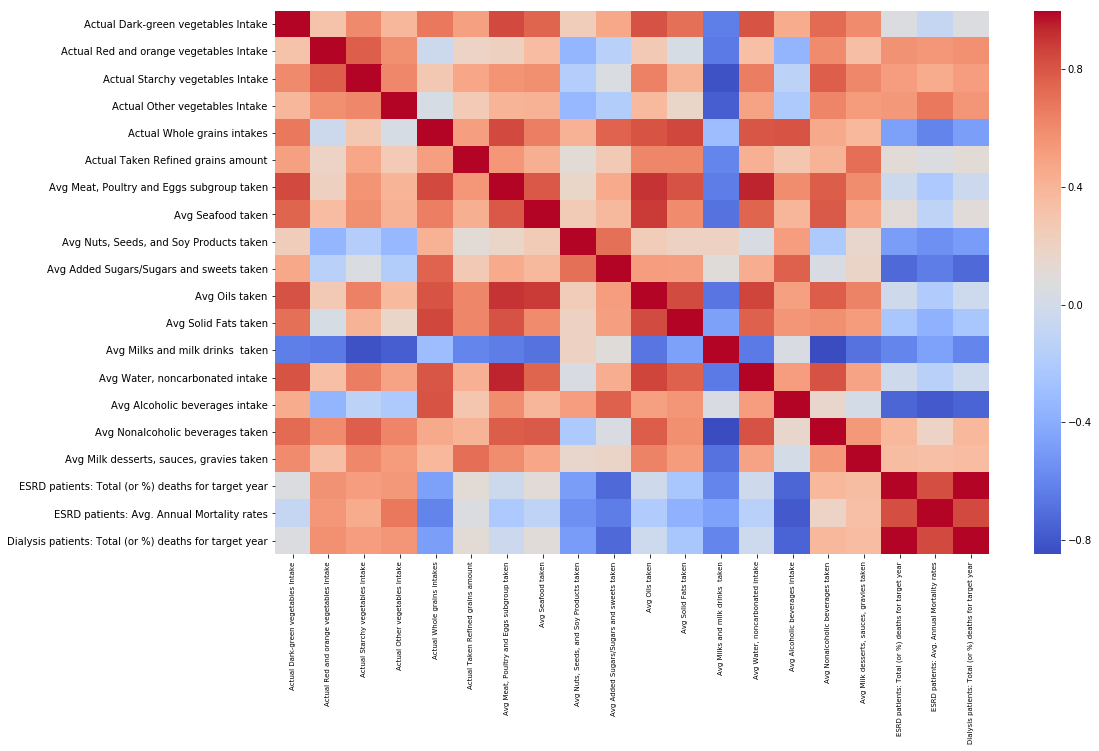

In [96]:
plt.figure(figsize=(16, 10));

diffs = list(df_pca.columns[:-1]) 
import seaborn as sns
s = sns.heatmap(df_pca[diffs].corr(),cmap='coolwarm') 
#s.set_yticklabels(s.get_yticklabels(),rotation=60,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=7)
plt.savefig('../../progress_reports/to_submit/pca_univariate_bivariate/pca_food_sub_groups_how_in_together_influencing_PCA_components' + '.png')            
plt.show()

https://www.kaggle.com/etakla/exploring-the-dataset-univariate-analysis
https://www.kaggle.com/etakla/exploring-the-dataset-bivariate-analysis
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e
https://lifelines.readthedocs.io/en/latest/
https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html
https://www.statsdirect.com/help/survival_analysis/cox_regression.htm
https://courses.lumenlearning.com/suny-natural-resources-biometrics/chapter/chapter-7-correlation-and-simple-linear-regression/

# References
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

https://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
